In [199]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# 1. Data Ingestion
Loading the data using pandas function called `read_excel`

In [200]:
metadata = pd.read_excel("./Data/Election_Data.xlsx")
metadata

,**Data Dictionary**
0,NaN
1,1. vote: Party choice: Conservative or Labour
2,NaN
3,2. age: in years
4,NaN
5,3. economic.cond.national: Assessment of curre...
6,NaN
7,4. economic.cond.household: Assessment of curr...
8,NaN
9,"5. Blair: Assessment of the Labour leader, 1 t..."


| Column                      | Description |
|-----------------------------|-------------|
| vote                        | Party choice: Conservative or Labour |
| age                         | Age in years |
| economic.cond.national      | Assessment of current national economic conditions, 1 to 5 |
| economic.cond.household     | Assessment of current household economic conditions, 1 to 5 |
| Blair                       | Assessment of the Labour leader, 1 to 5 |
| Hague                       | Assessment of the Conservative leader, 1 to 5 |
| Europe                      | An 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment |
| political.knowledge         | Knowledge of parties' positions on European integration, 0 to 3 |
| gender                      | Female or male |


In [201]:
df = pd.read_excel("./Data/Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")

In [202]:
df

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


# 2. Data Preparation

- We'll check for null values and check for non-required columns.

## Structure of the data

In [203]:
df.shape # num Of rows and columns

(1525, 10)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


- We can see `Unnamed: 0` is serial number column which is of no use. We'll remove that row
- And there are two columns which is of type object
- vote is our target value, we need to classify new data point to the classes given in vote

In [205]:
df["vote"].value_counts()

vote
Labour          1063
Conservative     462
Name: count, dtype: int64

## Missing values and removing unnecessary columns

In [206]:
df.drop(columns = "Unnamed: 0", axis = 1, inplace = True)

In [207]:
def data_quality_check(df):
    '''
        Function for checking the quality of the data, i.e., null values
    '''
    print("Number of null values")
    print(df.isnull().sum())
    
    

In [208]:
data_quality_check(df)

Number of null values
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


## Summary Statistics of the data

In [209]:
df.describe()   # Summary statistics for numerical data

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [210]:
df.describe(include="object")  # get summary statistics for categorical variable

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


- There are no null values in any column, so we need not do any type of imputation. 

## Checking and handling duplicates

In [211]:
df[df.duplicated()]  # number of duplicate rows

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


# Exploratory Data Analysis

- Now we'll examine the pattern in the data.

## Univariate Data Analysis (Single Variable)

In [212]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


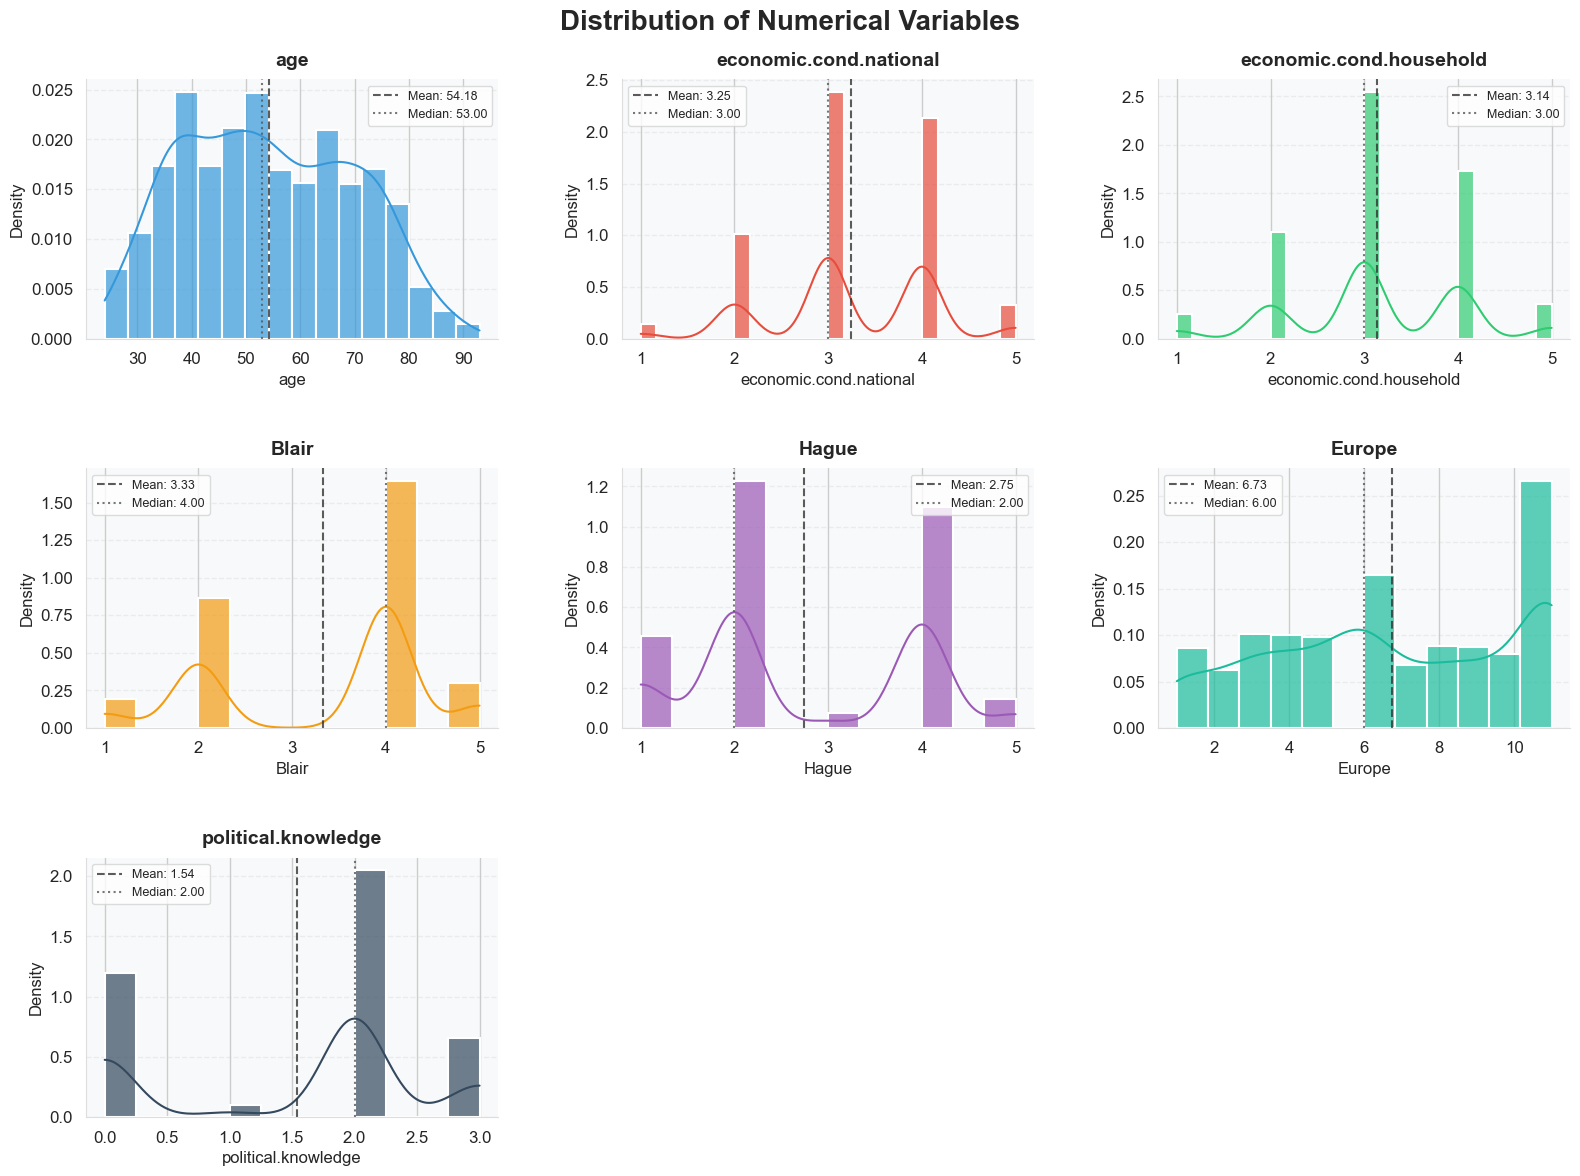

In [213]:
import matplotlib.gridspec as gridspec

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

# Get number of numerical columns
num_cols = len(df.select_dtypes(include=np.number).columns)

# Calculate optimal grid layout
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(num_cols / n_cols))  # Number of rows needed

# Create figure
fig = plt.figure(figsize=(16, 4 * n_rows))

# Create GridSpec
gs = gridspec.GridSpec(n_rows, n_cols, figure=fig)

# Create a modern, visually appealing color palette
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6", "#1abc9c", "#34495e"]

# Function to style each histogram
def style_histogram(ax, data, column_name, color):
    # Create histogram with KDE
    sns.histplot(
        data=data,
        kde=True,
        ax=ax,
        color=color,
        alpha=0.7,
        edgecolor='white',
        linewidth=1.5,
        stat='density'
    )
    
    # Add a vertical line for the mean
    mean_val = data.mean()
    ax.axvline(
        x=mean_val, 
        color='#333333', 
        linestyle='--', 
        linewidth=1.5,
        alpha=0.8,
        label=f'Mean: {mean_val:.2f}'
    )
    
    # Add a vertical line for the median
    median_val = data.median()
    ax.axvline(
        x=median_val, 
        color='#555555', 
        linestyle=':', 
        linewidth=1.5,
        alpha=0.8,
        label=f'Median: {median_val:.2f}'
    )
    
    # Style the plot
    ax.set_title(column_name, fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel(column_name, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    
    # Add a legend
    ax.legend(frameon=True, facecolor='white', edgecolor='lightgray', fontsize=9)
    
    # Remove top and right spines
    sns.despine(ax=ax)
    
    # Improve grid appearance
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)
    
    # Set background color
    ax.set_facecolor('#f8f9fa')

# Get numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Create each histogram
for i, col in enumerate(numerical_columns):
    # Calculate position in grid
    row = i // n_cols
    col_pos = i % n_cols
    
    # Create subplot
    ax = fig.add_subplot(gs[row, col_pos])
    
    # Style the histogram
    style_histogram(ax, df[col], col, colors[i % len(colors)])

# Add main title
fig.suptitle('Distribution of Numerical Variables', fontsize=20, fontweight='bold', y=0.98)

# Add subtle border
for ax in fig.axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('#dddddd')
        spine.set_linewidth(0.8)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show plot
plt.show()

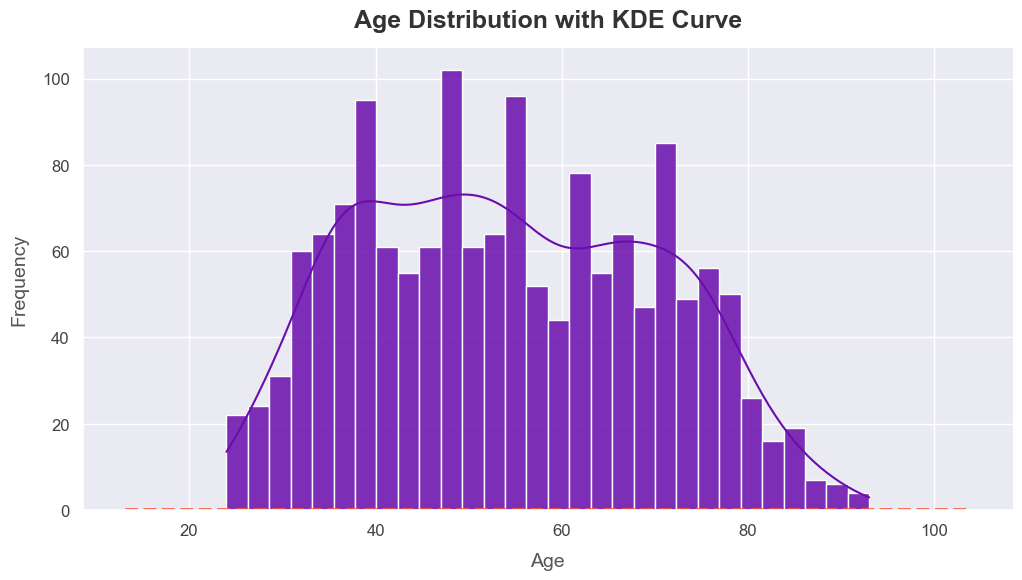

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")  
plt.figure(figsize=(12, 6))
bar_color = "#6A0DAD"  # A modern deep purple
line_color = "#FF5733"  # A vibrant orange for KDE

sns.histplot(df["age"], kde=True, bins=30, color=bar_color, edgecolor="white", alpha=0.85)
sns.kdeplot(df["age"], color=line_color, linewidth=2.5, linestyle="--")

plt.title("Age Distribution with KDE Curve", fontsize=18, fontweight="bold", pad=15, color="#333333")
plt.xlabel("Age", fontsize=14, fontweight="medium", labelpad=10, color="#555555")
plt.ylabel("Frequency", fontsize=14, fontweight="medium", labelpad=10, color="#555555")

sns.despine()

plt.xticks(fontsize=12, color="#444444")
plt.yticks(fontsize=12, color="#444444")

# Show the final plot
plt.show()


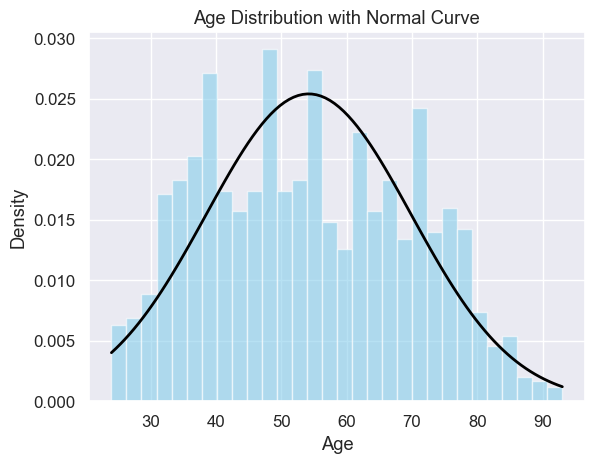

In [215]:
import scipy.stats as stats
mu, sigma = df['age'].mean(), df['age'].std()

# Generate values for normal distribution curve
x = np.linspace(df['age'].min(), df['age'].max(), 100)
y = stats.norm.pdf(x, mu, sigma)  # Normal Probability Density Function (PDF)

# Plot histogram
plt.hist(df['age'], bins=30, density=True, alpha=0.6, color='skyblue')

# Plot normal distribution curve
plt.plot(x, y, 'black', linewidth=2)

plt.title('Age Distribution with Normal Curve')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

- There's not that much deviation from the gaussian distribution of age variable. So we can infer that under some condition age variable is following gaussian distribution.

C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_10628\1356704015.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vote_plot = sns.countplot(
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_10628\1356704015.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_plot = sns.countplot(


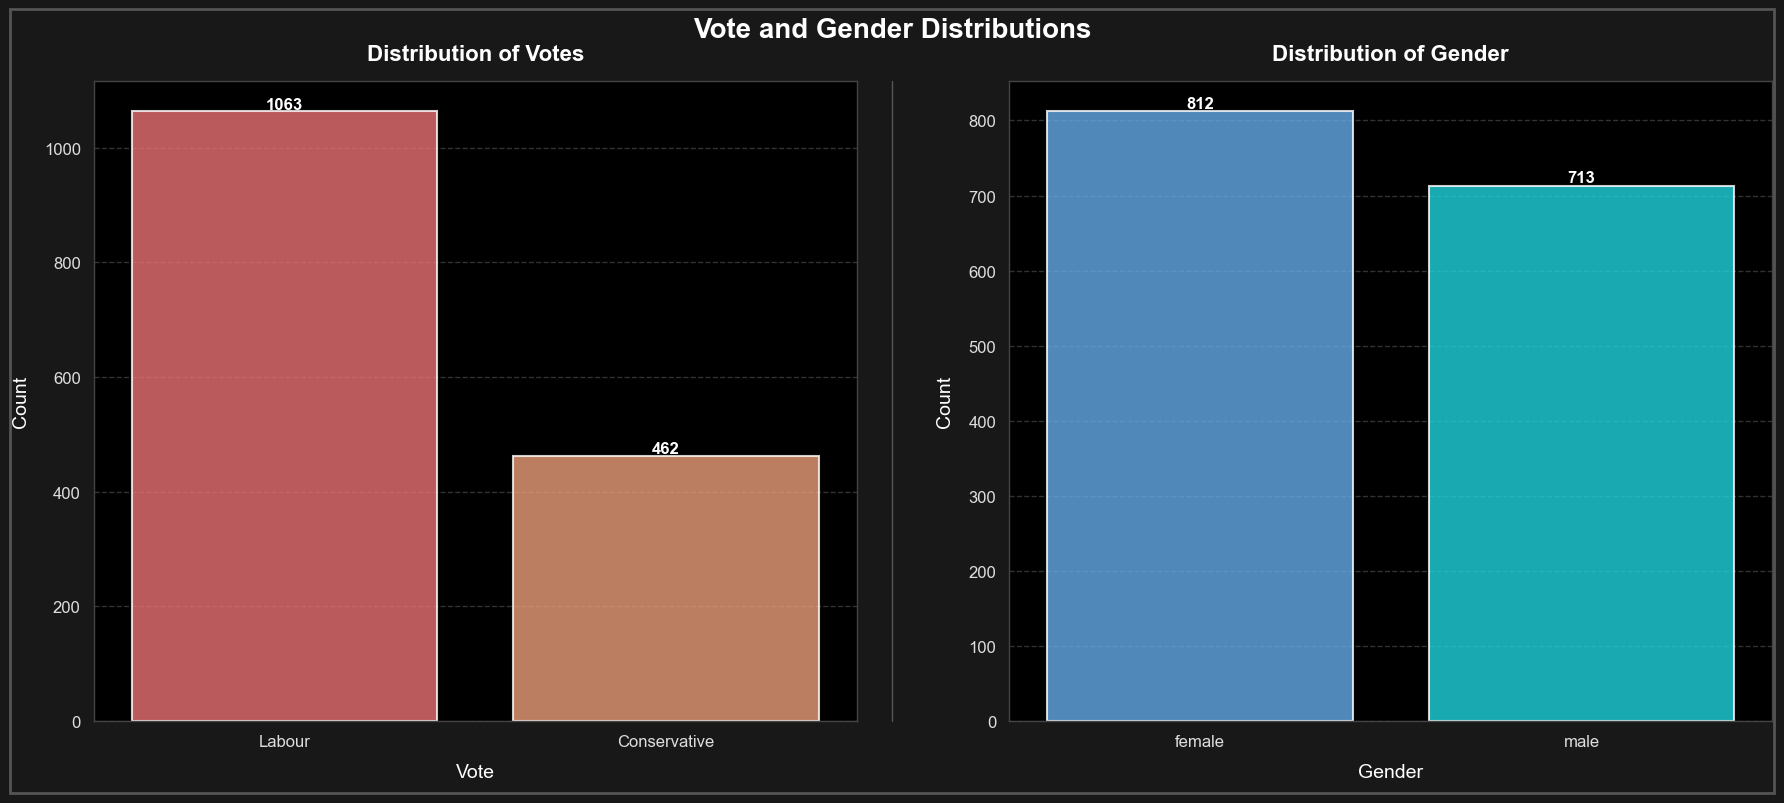

In [216]:
from matplotlib import cm

plt.style.use("dark_background")

# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Color gradients that work well with dark background
vote_colors = ["#ff5e62", "#ff9966"]  # Warm gradient
gender_colors = ["#4facfe", "#00f2fe"]  # Cool gradient

# First plot - Vote counts
vote_plot = sns.countplot(
    x=df['vote'], 
    ax=axes[0],
    palette=vote_colors,
    edgecolor='#ffffff',
    linewidth=1.5,
    alpha=0.8
)

# Second plot - Gender counts
gender_plot = sns.countplot(
    x=df['gender'], 
    ax=axes[1],
    palette=gender_colors,
    edgecolor='#ffffff',
    linewidth=1.5,
    alpha=0.8
)

# Enhance the plots with titles, labels, and styling
for i, (ax, title, variable) in enumerate(zip(
    axes, 
    ["Distribution of Votes", "Distribution of Gender"], 
    ["vote", "gender"]
)):
    # Add a subtle grid
    ax.grid(axis='y', linestyle='--', alpha=0.2, color="#ffffff")
    ax.set_axisbelow(True)
    
    # Style title and labels
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15, color='#ffffff')
    ax.set_xlabel(variable.capitalize(), fontsize=14, labelpad=10, color='#ffffff')
    ax.set_ylabel("Count", fontsize=14, labelpad=10, color='#ffffff')
    
    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + 5,
            f'{int(height)}',
            ha="center",
            color='#ffffff',
            fontsize=12,
            fontweight='bold'
        )
    
    # Style the spines
    for spine in ax.spines.values():
        spine.set_edgecolor('#444444')
        spine.set_linewidth(1)
    
    # Enhance tick labels
    ax.tick_params(axis='both', colors='#dddddd', labelsize=12)

# Main title for the figure
fig.suptitle('Vote and Gender Distributions', 
             fontsize=20, fontweight='bold', y=0.98, color='#ffffff')

# Add a subtle glow effect to the figure
fig.patch.set_alpha(0.9)

# Add a separator line between the plots
separator = plt.Line2D([0.5, 0.5], [0.1, 0.9], 
                     transform=fig.transFigure, figure=fig,
                     color='#555555', linestyle='-', linewidth=1)
fig.add_artist(separator)

# Add a decorative border around the entire figure
border = plt.Rectangle((0.01, 0.01), 0.98, 0.98, 
                       fill=False, transform=fig.transFigure, 
                       figure=fig, color='#555555', linewidth=2)
fig.add_artist(border)

# Improve spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.2)

# Show plot
plt.show()

- We can see there is imbalance of the data in vote variable. Let's see how much percent of each values is contributing

In [217]:
rows = df.shape[0]

round((df["vote"].value_counts() * 100) / rows, 2)

vote
Labour          69.7
Conservative    30.3
Name: count, dtype: float64

- So there are 70 % of the values are covered by Labour.

## Bivariate Data Analysis (Relationship between the variables)

### <p align="center">Numerical vs Numerical</p>

In [218]:
df.corr(numeric_only = True)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


- we can see that we are not able to understand through the values, so let's create heat map for the correlation of the variables

Text(0.5, 1.0, 'Correlation coefficient value of different columns')

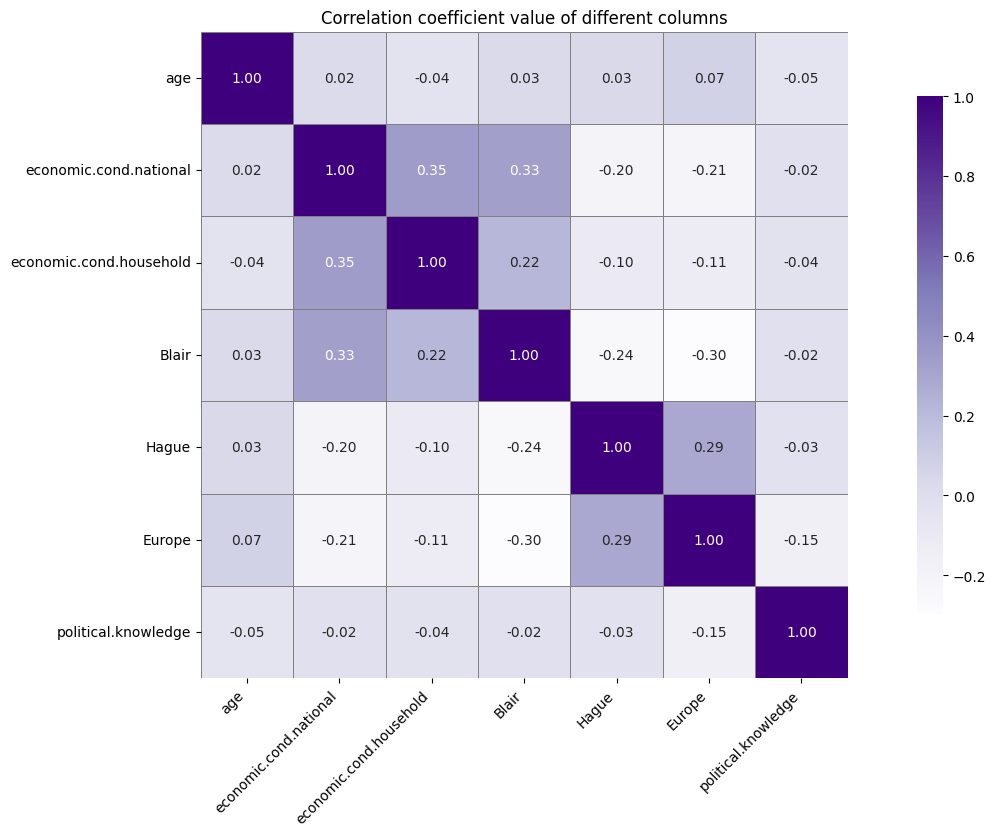

In [219]:
plt.style.use("default")
plt.figure(figsize = (14, 8))
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(
    corr_matrix,
    annot=True,               
    cmap="Purples",           
    annot_kws={"size": 10},   
    fmt=".2f",                
    linewidths=0.5,           
    linecolor="gray",         
    cbar_kws={"shrink": 0.8}, 
    square=True
)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout(pad = 0.2)
plt.title("Correlation coefficient value of different columns")
 


- We can see that there is correlation of $0.35$ between `economic.cond.household` and `economic.cond.national`. 

What should we do?
1. Is 0.35 Too High for Multicollinearity?
    - No, a correlation of 0.35 is not high enough to indicate serious multicollinearity.
    - Typically, multicollinearity becomes a problem if |r| > 0.7 between independent variables.

2. Does It Affect Model Performance?
    - If these correlated features provide unique information, they may still improve the model.
    - If they contain redundant information, one of them might be unnecessary.
    - **Action**: Run feature importance analysis (like SHAP or permutation importance) to check if both features contribute.

3. Shall we Drop One of the Features?
    - If we will use tree-based models (e.g., Decision Trees, Random Forest, XGBoost, etc.), they handle correlated features well, so we don’t need to drop anything.
    - If we will use linear models (e.g., Logistic Regression, SVM), mild correlation usually isn’t a big issue, but feature scaling & regularization (L1/L2) can help.
    - **Action**: If using Logistic Regression, check Variance Inflation Factor (VIF) to detect multicollinearity.
    - VIF > 5 or 10 → Feature is highly collinear and might need removal.

C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

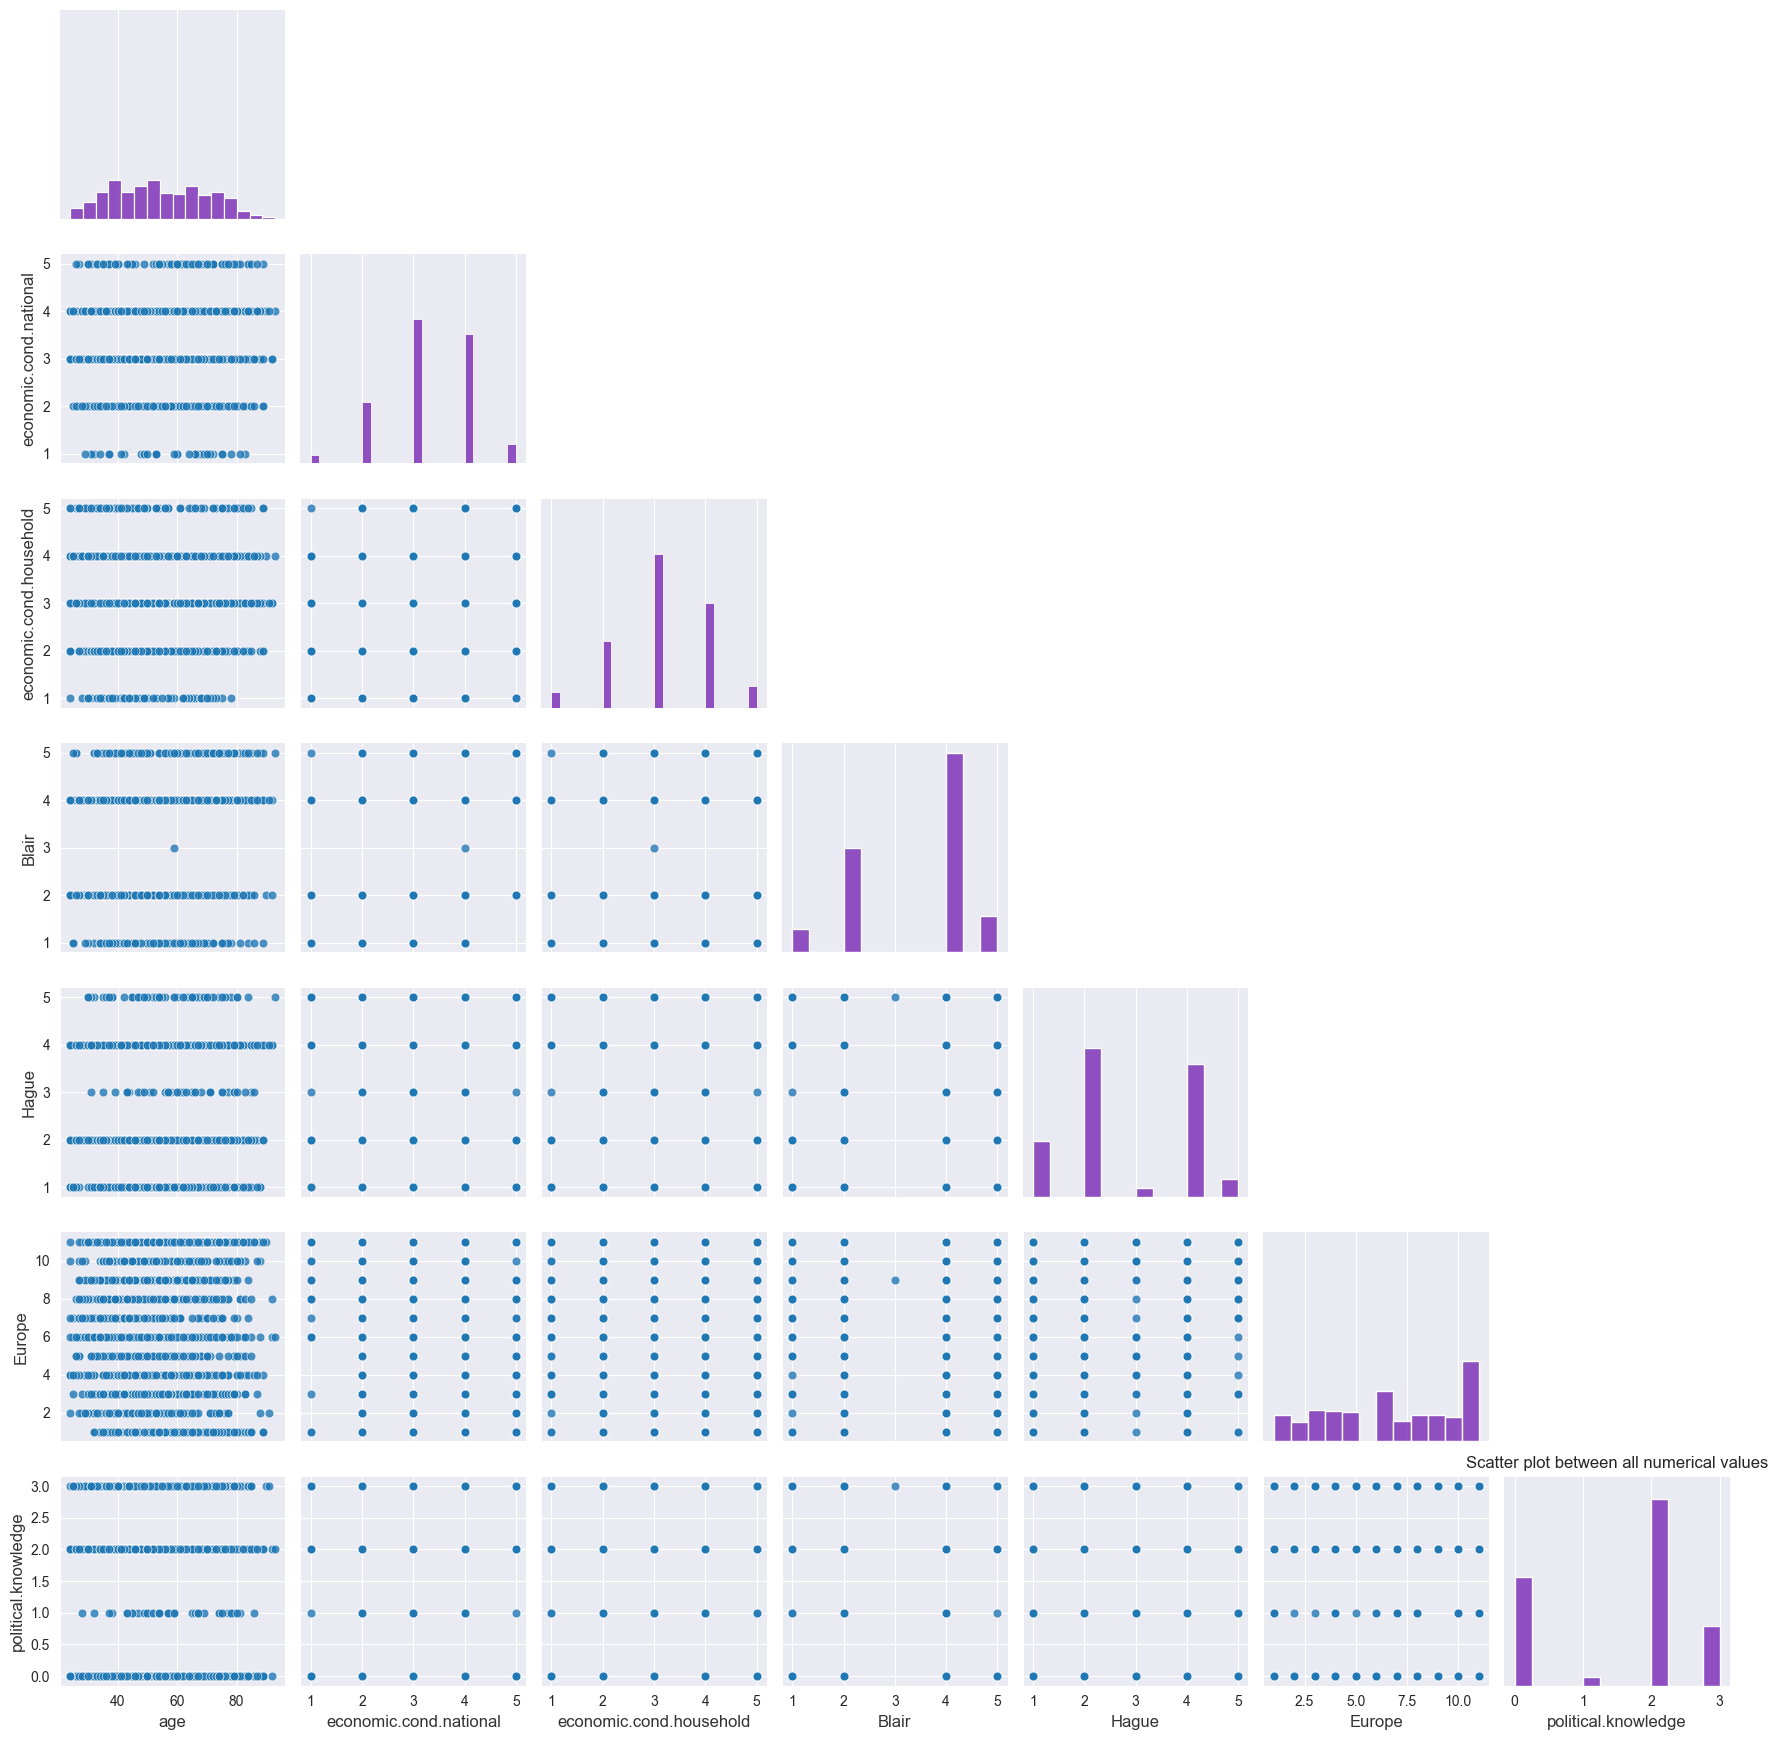

In [220]:
sns.set_style("darkgrid")  # Alternative: "whitegrid", "ticks"

custom_palette = "coolwarm"  # Other options: "viridis", "mako", "rocket"

# Create a pairplot with enhanced aesthetics
g = sns.pairplot(
    data=df,
    kind="scatter",
    palette=custom_palette,
    corner=True,  # Removes redundant upper triangle plots
    plot_kws={"s": 40, "edgecolor": "white", "alpha": 0.8},  # Customize scatter points
    diag_kws={"color": "#6A0DAD", "alpha": 0.7},  # Color for diagonal histograms
)

for ax in g.axes.flat:
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight="medium", color="#333333")
        ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight="medium", color="#333333")

plt.title("Scatter plot between all numerical values")
# Adjust spacing
plt.tight_layout()
plt.show()

### <p align="center">Categrical v/s Categorical</p>

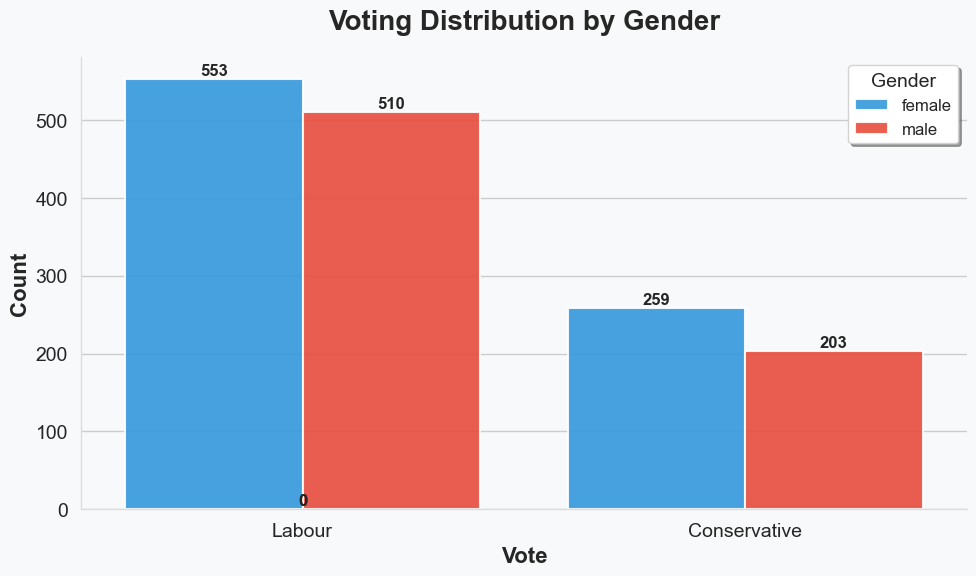

In [221]:
import matplotlib.patches as mpatches

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create a custom color palette - modern, appealing colors
custom_palette = ["#3498db", "#e74c3c"]  # Blue and Red

# Create the figure with a specific size for better proportions
plt.figure(figsize=(10, 6))

# Create the plot with custom settings
ax = sns.countplot(
    x='vote', 
    hue='gender', 
    data=df,
    palette=custom_palette,
    alpha=0.9,
    edgecolor='white',
    linewidth=1.5,
    saturation=1.0
)

sns.despine()

plt.title('Voting Distribution by Gender', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Vote', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 5,
        f'{int(height)}',
        ha="center",
        fontsize=12,
        fontweight='bold'
    )

# Customize legend
plt.legend(
    title='Gender',
    fontsize=12,
    title_fontsize=14,
    frameon=True,
    facecolor='white',
    edgecolor='lightgray',
    shadow=True,
    loc='upper right'
)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
plt.gcf().set_facecolor('#f8f9fa')

# Add a border around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('#ddd')
    spine.set_linewidth(1)

# Improve the tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()

### <p align="center">Categorical v/s Numerical</p>

In [222]:
# Extract all numerical values
numerical_cols = []

for cols in df.columns:
    if df[cols].dtype != "object":
        numerical_cols.append(cols)
        
print(numerical_cols)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_10628\2101094440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_10628\2101094440.py:12: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_10628\2101094440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_10628\2101094440.py:12: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_10628\2101094440.py:12: Future

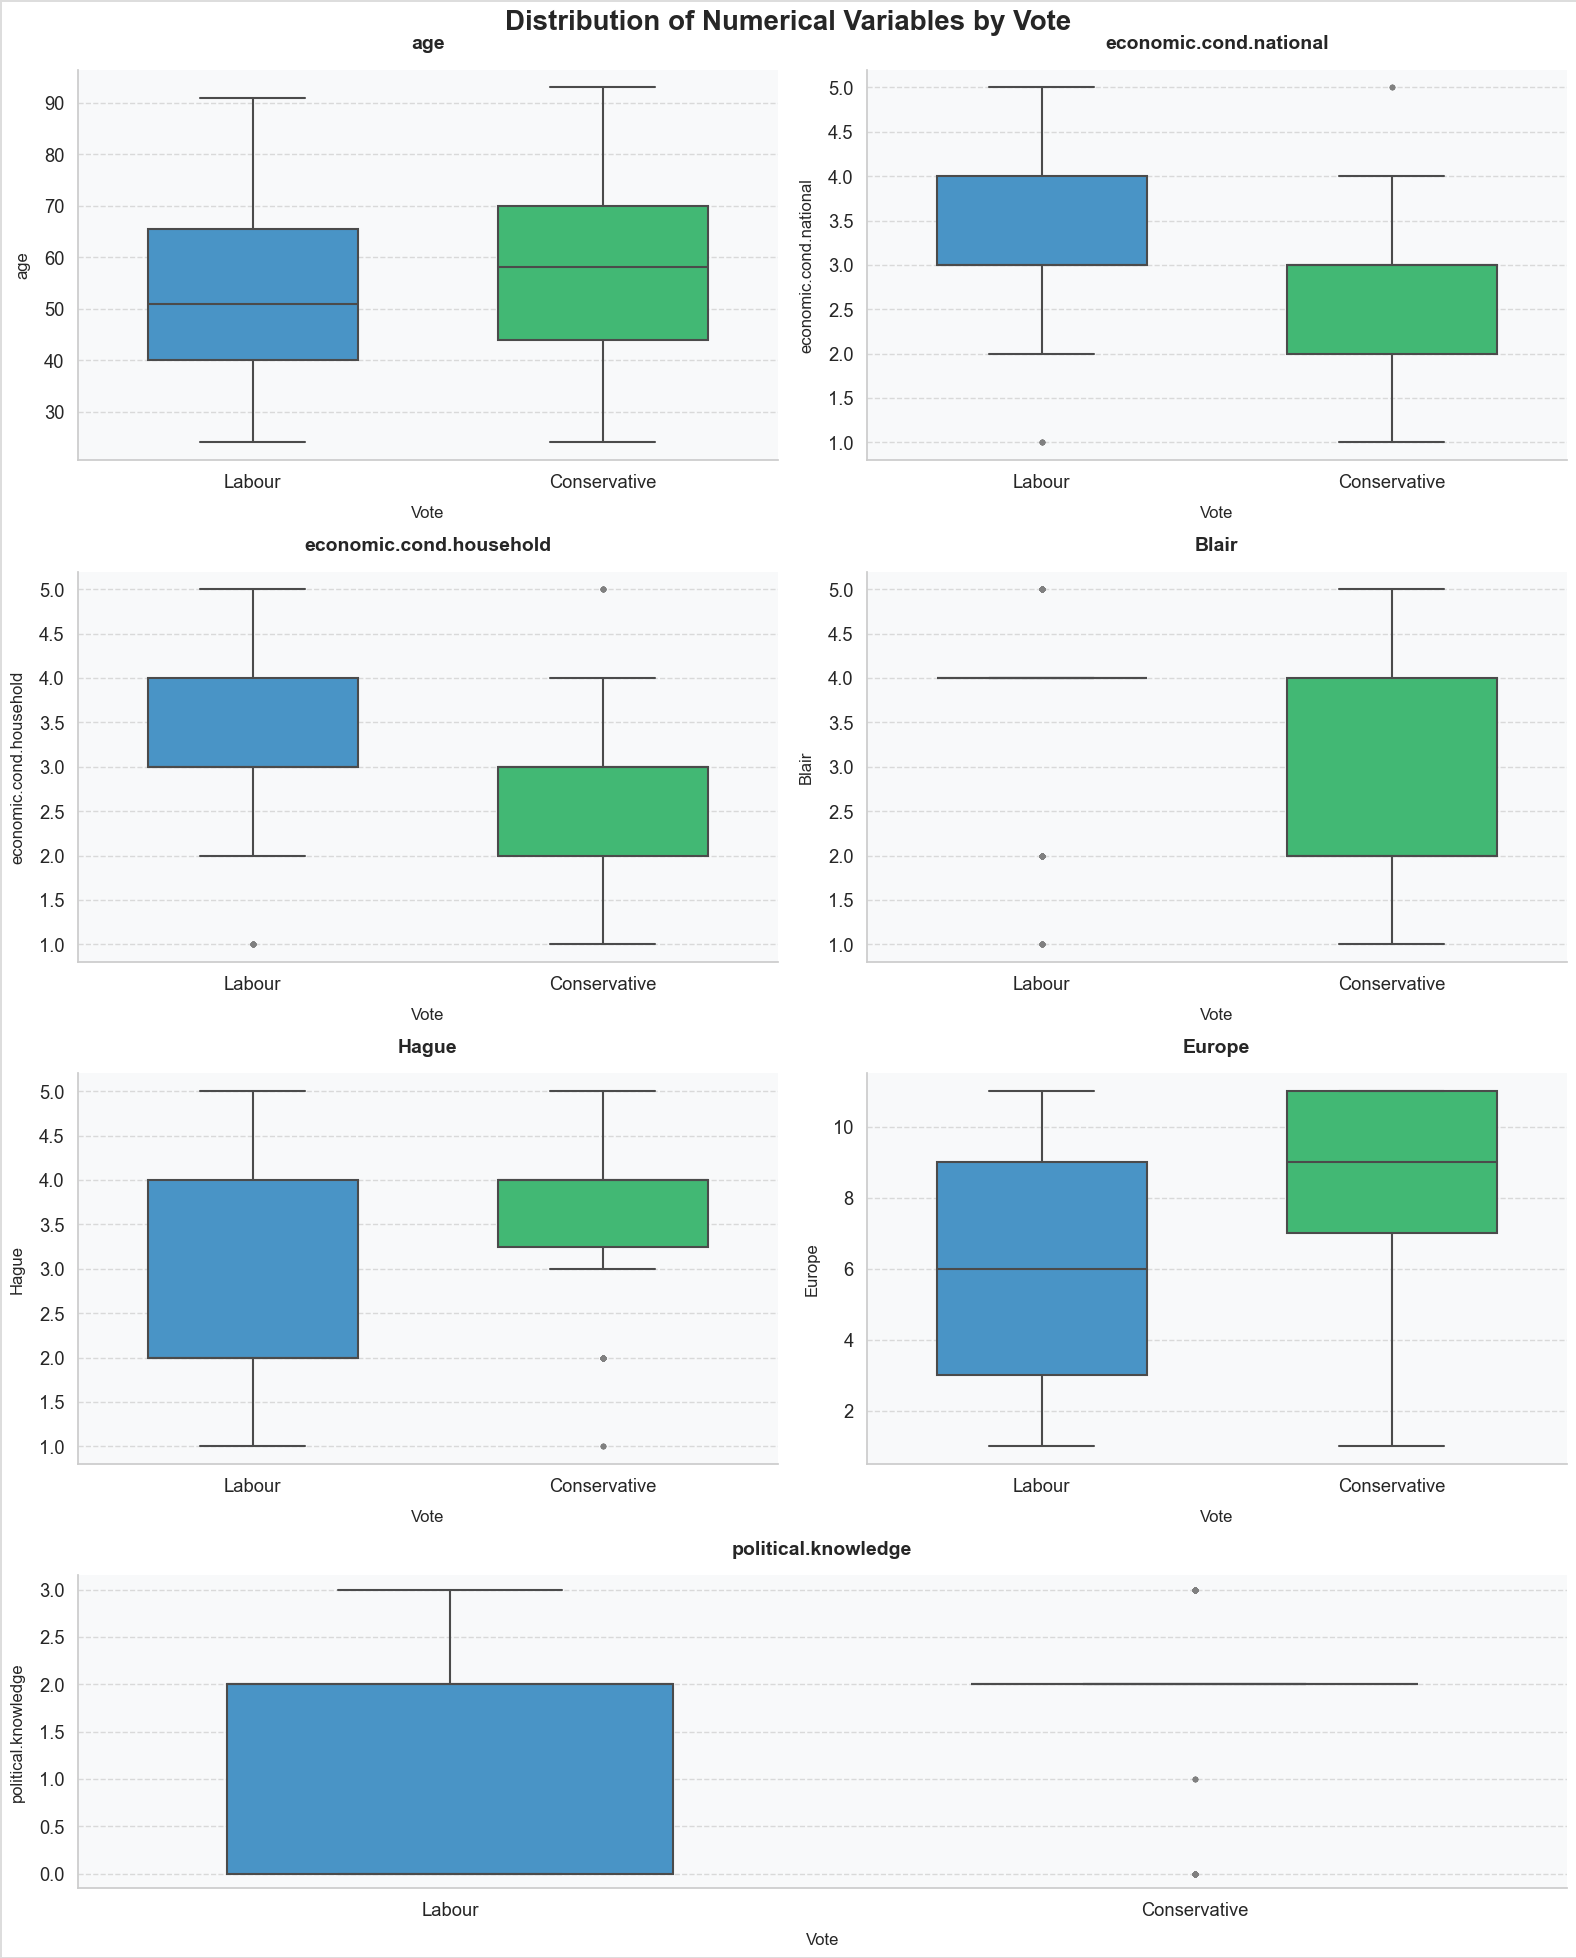

In [223]:
import matplotlib.gridspec as gridspec



fig = plt.figure(figsize=(16, 20))
gs = gridspec.GridSpec(4, 2, figure=fig, height_ratios=[1, 1, 1, 0.8])

palette = ["#3498db", "#2ecc71", "#9b59b6", "#e74c3c", "#f39c12"]

# Function to create a styled boxplot
def create_styled_boxplot(x, y, ax, title):
    sns.boxplot(
        x=x, 
        y=y, 
        ax=ax,
        palette=palette,
        width=0.6,
        linewidth=1.5,
        fliersize=4,
        flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'none', 'alpha': 0.5}
    )
    
    # Style the plot
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Vote', fontsize=12, labelpad=10)
    ax.set_ylabel(title, fontsize=12, labelpad=10)
    
    # Remove top and right spines
    sns.despine(ax=ax)
    
    # Improve grid appearance
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    
    # Style background
    ax.set_facecolor('#f8f9fa')

# Create the first 6 boxplots (3 rows, 2 columns)
j = 0
for i in range(0, 6, 2):
    # Create boxplot in left column
    ax1 = fig.add_subplot(gs[j, 0])
    create_styled_boxplot(
        x=df['vote'], 
        y=df[numerical_cols[i]], 
        ax=ax1, 
        title=numerical_cols[i]
    )
    
    # Create boxplot in right column
    ax2 = fig.add_subplot(gs[j, 1])
    create_styled_boxplot(
        x=df['vote'], 
        y=df[numerical_cols[i + 1]], 
        ax=ax2, 
        title=numerical_cols[i + 1]
    )
    
    j += 1

# Create the 7th boxplot centered in the bottom row
ax7 = fig.add_subplot(gs[3, :])
create_styled_boxplot(
    x=df['vote'], 
    y=df[numerical_cols[-1]], 
    ax=ax7, 
    title=numerical_cols[-1]
)

# Add a main title
fig.suptitle('Distribution of Numerical Variables by Vote', 
             fontsize=20, fontweight='bold', y=0.98)

# Add subtle figure border
fig.patch.set_linewidth(1)
fig.patch.set_edgecolor('#dddddd')
fig.patch.set_facecolor('#ffffff')

# Adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.3)

# Show the plot
plt.show()

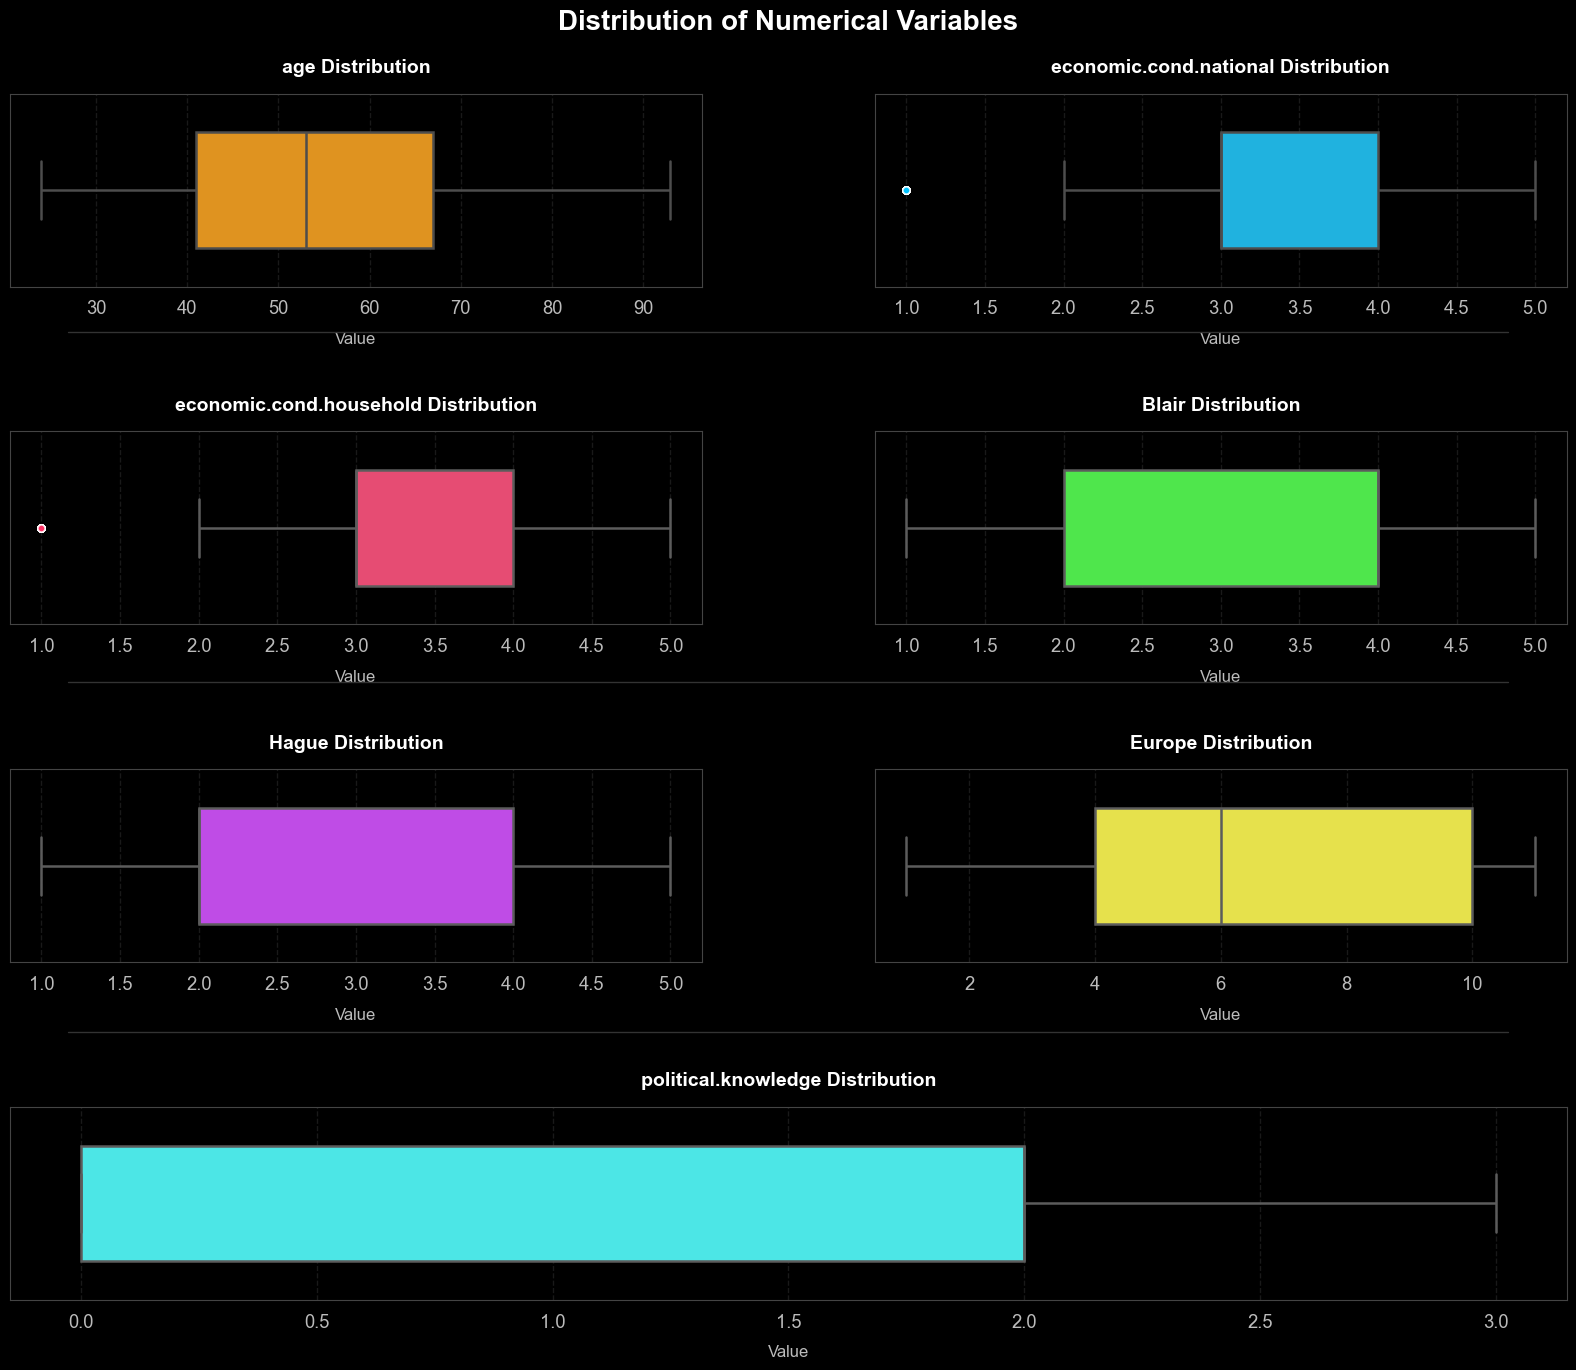

In [224]:


# Set the style
plt.style.use("dark_background")

# Create a color palette that works well with dark background
colors = ["#ff9a00", "#00c3ff", "#ff3366", "#36ff33", "#cc33ff", "#fff933", "#33ffff"]

# Create a figure with custom layout
fig = plt.figure(figsize=(16, 14))

# Use GridSpec for more control over layout
gs = gridspec.GridSpec(4, 2, figure=fig)

# Safely handle the 7 numerical columns
num_cols = len(numerical_cols)
col_index = 0

# Create a function to style each plot consistently
def style_boxplot(ax, data, title, color):
    # Create boxplot with custom styling
    sns.boxplot(
        x=data, 
        ax=ax, 
        orient='h',
        color=color,
        width=0.6,
        linewidth=1.8,
        fliersize=5,
        flierprops={'marker': 'o', 'markerfacecolor': color, 'markeredgecolor': '#ffffff', 'alpha': 0.7}
    )
    
    # Style the plot
    ax.set_title(f"{title} Distribution", fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel("Value", fontsize=12, labelpad=10)
    
    # Add a subtle grid
    ax.grid(axis='x', linestyle='--', alpha=0.3, color='#555555')
    ax.set_axisbelow(True)
    
    # Add a thin box around the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('#444444')
        spine.set_linewidth(0.8)
    
    # Style the text elements
    ax.tick_params(axis='x', colors='#bbbbbb')
    ax.tick_params(axis='y', colors='#bbbbbb')
    ax.title.set_color('#ffffff')
    ax.xaxis.label.set_color('#bbbbbb')

# Loop through the first 3 rows (6 plots if available)
for row in range(3):
    # Left plot
    if col_index < num_cols:
        ax_left = fig.add_subplot(gs[row, 0])
        style_boxplot(ax_left, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])
        col_index += 1
    
    # Right plot
    if col_index < num_cols:
        ax_right = fig.add_subplot(gs[row, 1])
        style_boxplot(ax_right, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])
        col_index += 1

# Special handling for the 7th plot (if it exists) - center it in bottom row
if col_index < num_cols:
    ax_bottom = fig.add_subplot(gs[3, :])
    style_boxplot(ax_bottom, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])

# Add an elegant title to the entire figure
fig.suptitle('Distribution of Numerical Variables', 
             fontsize=20, fontweight='bold', y=0.98, color='#ffffff')

# Add subtle dividing lines between rows
for row in range(1, 4):
    y_position = 1.0 - (row * 0.25)
    line = plt.Line2D([0.05, 0.95], [y_position, y_position], 
                     transform=fig.transFigure, figure=fig,
                     color='#333333', linestyle='-', linewidth=1)
    fig.add_artist(line)

# Adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.75, wspace=0.25)

# Show the plot
plt.show()

- We can see there are outliers. But let's see first and we'll treat them before making linear model

In [225]:

outlier_cols = ["economic.cond.national", "economic.cond.household"]

In [226]:
def get_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

In [227]:
for i in outlier_cols:
    print(get_outliers(i).shape)

(37, 9)
(65, 9)


- Let's treat outliers 


In [228]:
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outlier only if there are error
    # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Outlier treatment
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


In [229]:
for col in outlier_cols:
    treat_outliers(df, col)

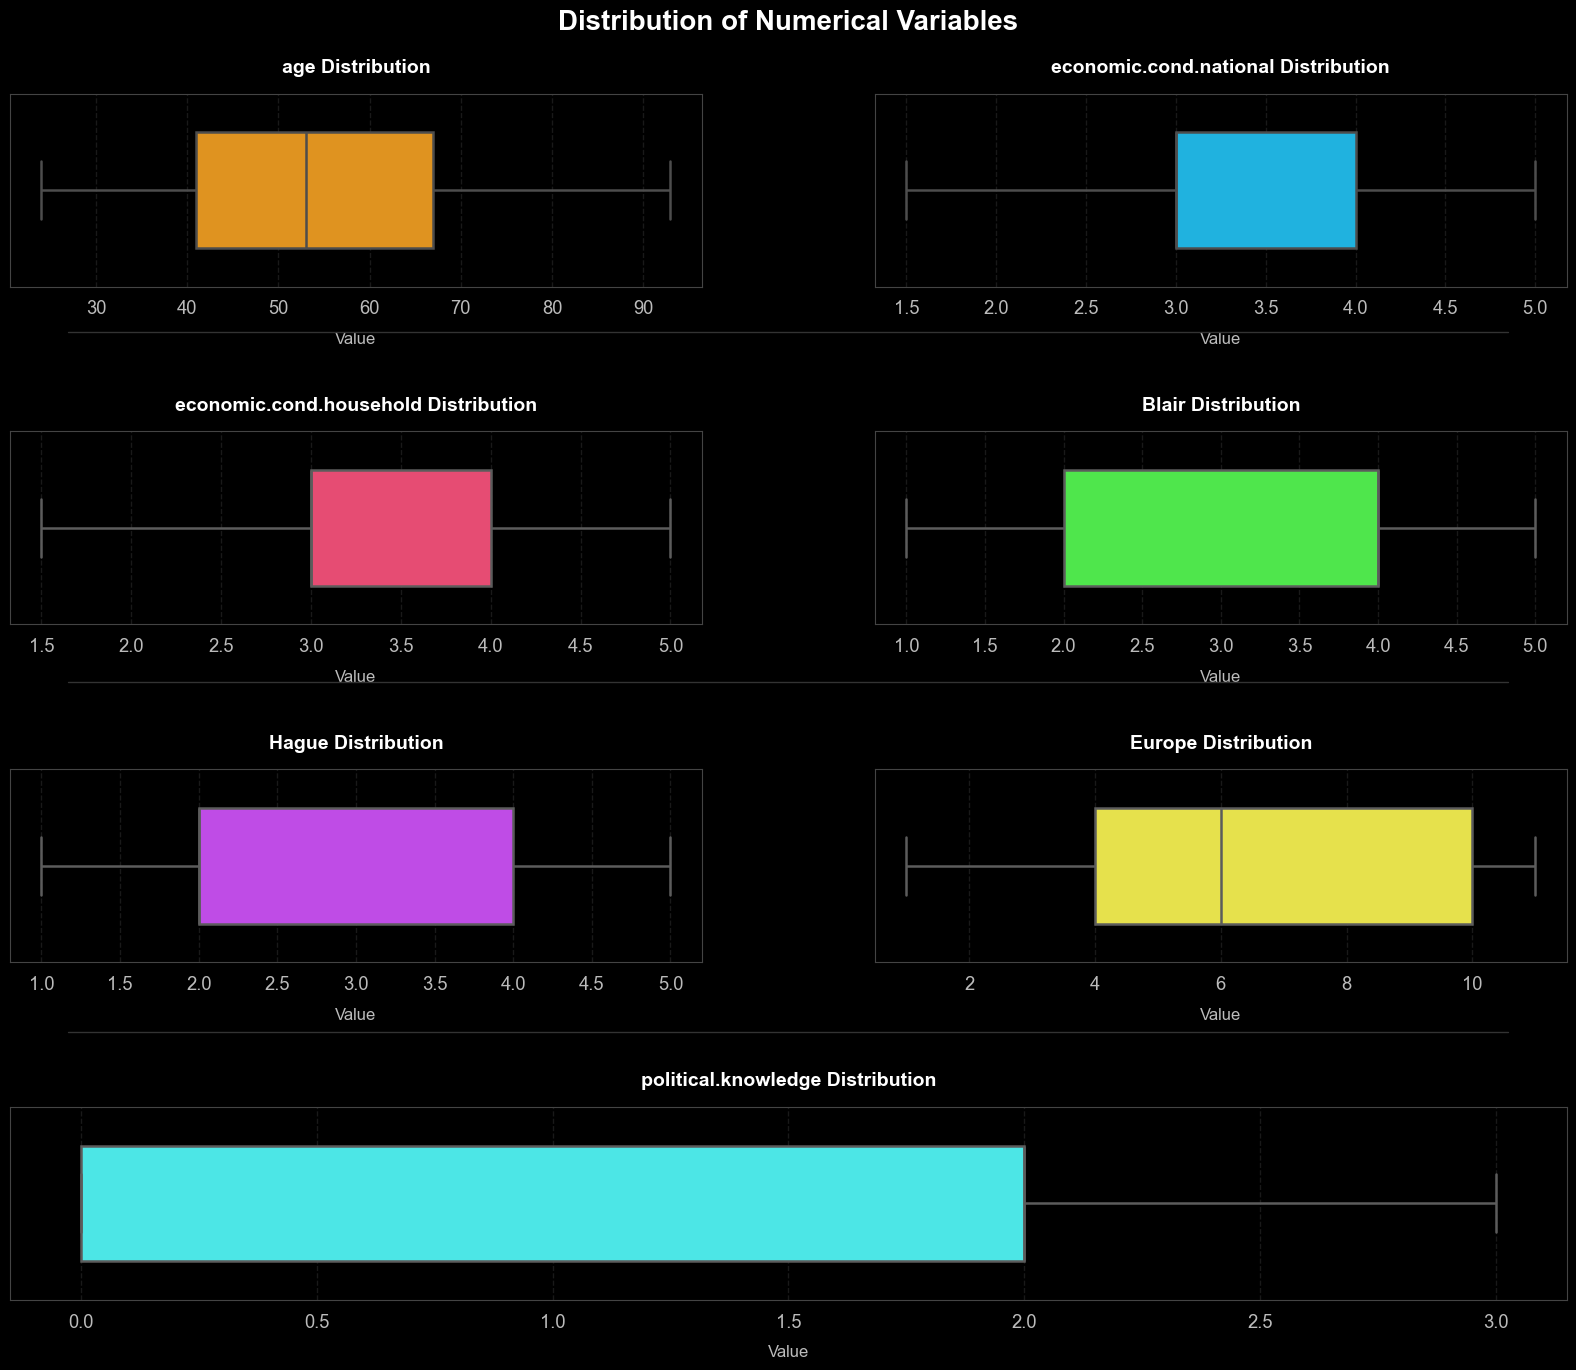

In [230]:


# Set the style
plt.style.use("dark_background")

# Create a color palette that works well with dark background
colors = ["#ff9a00", "#00c3ff", "#ff3366", "#36ff33", "#cc33ff", "#fff933", "#33ffff"]

# Create a figure with custom layout
fig = plt.figure(figsize=(16, 14))

# Use GridSpec for more control over layout
gs = gridspec.GridSpec(4, 2, figure=fig)

# Safely handle the 7 numerical columns
num_cols = len(numerical_cols)
col_index = 0

# Create a function to style each plot consistently
def style_boxplot(ax, data, title, color):
    # Create boxplot with custom styling
    sns.boxplot(
        x=data, 
        ax=ax, 
        orient='h',
        color=color,
        width=0.6,
        linewidth=1.8,
        fliersize=5,
        flierprops={'marker': 'o', 'markerfacecolor': color, 'markeredgecolor': '#ffffff', 'alpha': 0.7}
    )
    
    # Style the plot
    ax.set_title(f"{title} Distribution", fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel("Value", fontsize=12, labelpad=10)
    
    # Add a subtle grid
    ax.grid(axis='x', linestyle='--', alpha=0.3, color='#555555')
    ax.set_axisbelow(True)
    
    # Add a thin box around the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('#444444')
        spine.set_linewidth(0.8)
    
    # Style the text elements
    ax.tick_params(axis='x', colors='#bbbbbb')
    ax.tick_params(axis='y', colors='#bbbbbb')
    ax.title.set_color('#ffffff')
    ax.xaxis.label.set_color('#bbbbbb')

# Loop through the first 3 rows (6 plots if available)
for row in range(3):
    # Left plot
    if col_index < num_cols:
        ax_left = fig.add_subplot(gs[row, 0])
        style_boxplot(ax_left, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])
        col_index += 1
    
    # Right plot
    if col_index < num_cols:
        ax_right = fig.add_subplot(gs[row, 1])
        style_boxplot(ax_right, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])
        col_index += 1

# Special handling for the 7th plot (if it exists) - center it in bottom row
if col_index < num_cols:
    ax_bottom = fig.add_subplot(gs[3, :])
    style_boxplot(ax_bottom, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])

# Add an elegant title to the entire figure
fig.suptitle('Distribution of Numerical Variables', 
             fontsize=20, fontweight='bold', y=0.98, color='#ffffff')

# Add subtle dividing lines between rows
for row in range(1, 4):
    y_position = 1.0 - (row * 0.25)
    line = plt.Line2D([0.05, 0.95], [y_position, y_position], 
                     transform=fig.transFigure, figure=fig,
                     color='#333333', linestyle='-', linewidth=1)
    fig.add_artist(line)

# Adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.75, wspace=0.25)

# Show the plot
plt.show()

In [231]:
for i in outlier_cols:
    display(get_outliers(i))

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


<hr>

# Feature Engineering

- Now we need to replace the `male` and `female` values of gender to numerical values and same with the votes column.

In [232]:
df_original = df.copy()

In [233]:
# We'll need something called LableEncoder
from sklearn.preprocessing import LabelEncoder

encoder_gender = LabelEncoder()
df["gender"] = encoder_gender.fit_transform(df["gender"])
encoder_gender.classes_, df["gender"].unique()

(array(['female', 'male'], dtype=object), array([0, 1]))

In [234]:
encoder_votes = LabelEncoder()
df["vote"] = encoder_votes.fit_transform(df["vote"])
encoder_votes.classes_, df["vote"].unique()

(array(['Conservative', 'Labour'], dtype=object), array([1, 0]))

### Summary of EDA

- removed unncessary columns
- No null values, so no null value treatment
- No multicollinearity 
- Gaussain Distribution of age variable
- Outlier handling

<hr>

# <h1 align="center"> Modelling <h1> 

In [235]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["vote"]), df["vote"], test_size=0.2, random_state=42)

In [236]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score
)

plt.style.use("dark_background")
def analyze_classification_model(model, X, y, figsize=(18, 12), threshold=0.5, class_names=None):
    """
    Comprehensive classification model evaluation function.
    
    Parameters
    ----------
    model : estimator
        Trained classification model with predict and predict_proba methods
    X : array-like
        Features for model evaluation
    y : array-like
        True labels for evaluation
    figsize : tuple, default=(18, 12)
        Size of the figure for visualizations
    threshold : float, default=0.5
        Decision threshold for binary classification
    class_names : list, default=None
        Names of the classes. If None, will use numerical labels
        
    Returns
    -------
    dict
        Dictionary containing all metrics and results
    """
    # Check if the model has predict_proba method (for ROC-AUC)
    has_predict_proba = hasattr(model, "predict_proba") and callable(getattr(model, "predict_proba"))
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Get predicted probabilities if available
    if has_predict_proba:
        y_proba = model.predict_proba(X)
    
    # Determine if binary or multiclass
    unique_classes = np.unique(y)
    is_binary = len(unique_classes) == 2
    
    # Set class names if not provided
    if class_names is None:
        class_names = [str(cls) for cls in unique_classes]
    
    # Create a results dictionary to hold all metrics
    results = {}
    
    # Basic metrics
    results['accuracy'] = accuracy_score(y, y_pred)
    
    # Prepare for multiclass or binary
    if is_binary:
        results['precision'] = precision_score(y, y_pred)
        results['recall'] = recall_score(y, y_pred)
        results['f1'] = f1_score(y, y_pred)
    else:
        results['precision'] = precision_score(y, y_pred, average='weighted')
        results['recall'] = recall_score(y, y_pred, average='weighted')
        results['f1'] = f1_score(y, y_pred, average='weighted')

    # Classification report
    results['classification_report'] = classification_report(y, y_pred, target_names=class_names)
    
    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    results['confusion_matrix'] = cm
    # Create a figure with subplots
    fig = plt.figure(figsize=figsize)
    
    # Determine number of subplots based on whether we can calculate ROC or not
    n_plots = 3 if (has_predict_proba and is_binary) else 2
    
    # Set up subplot grid
    if n_plots == 3:
        grid_spec = (2, 2)
    else:
        grid_spec = (1, 2)
    
    # Plot confusion matrix
    ax1 = plt.subplot2grid(grid_spec, (0, 0), rowspan=1, colspan=1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax1)
    ax1.set_ylabel('True Label')
    ax1.set_xlabel('Predicted Label')
    ax1.set_title('Confusion Matrix')
    
    # Plot normalized confusion matrix
    ax2 = plt.subplot2grid(grid_spec, (0, 1), rowspan=1, colspan=1)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax2)
    ax2.set_ylabel('True Label')
    ax2.set_xlabel('Predicted Label')
    ax2.set_title('Normalized Confusion Matrix')
    
    # If binary classification and predict_proba available, plot ROC curve
    if has_predict_proba and is_binary:
        # Get probabilities for positive class
        if y_proba.shape[1] == 2:  # Model returns probabilities for both classes
            y_score = y_proba[:, 1]
        else:  # Model returns probability for positive class only
            y_score = y_proba

        # Calculate ROC curve and ROC AUC
        fpr, tpr, _ = roc_curve(y, y_score)
        roc_auc = auc(fpr, tpr)
        results['roc_auc'] = roc_auc
        
        # Plot ROC curve
        ax3 = plt.subplot2grid(grid_spec, (1, 0), rowspan=1, colspan=1)
        ax3.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        ax3.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax3.set_xlim([0.0, 1.0])
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('False Positive Rate')
        ax3.set_ylabel('True Positive Rate')
        ax3.set_title('Receiver Operating Characteristic (ROC) Curve')
        ax3.legend(loc="lower right")
        
        # Calculate and plot precision-recall curve
        precision, recall, _ = precision_recall_curve(y, y_score)
        average_precision = average_precision_score(y, y_score)
        results['average_precision'] = average_precision
        
        ax4 = plt.subplot2grid(grid_spec, (1, 1), rowspan=1, colspan=1)
        ax4.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
        ax4.set_xlim([0.0, 1.0])
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Recall')
        ax4.set_ylabel('Precision')
        ax4.set_title('Precision-Recall Curve')
        ax4.legend(loc="upper right")
    
    plt.tight_layout()
    results['figure'] = fig
    
    # Print key metrics
    print("\n=== Classification Model Evaluation ===")
    print(f"Accuracy: {results['accuracy']:.4f}")
    if is_binary:
        print(f"Precision: {results['precision']:.4f}")
        print(f"Recall: {results['recall']:.4f}")
        print(f"F1 Score: {results['f1']:.4f}")
        if has_predict_proba:
            print(f"ROC AUC: {results.get('roc_auc', 'N/A')}")
            print(f"Average Precision: {results.get('average_precision', 'N/A')}")
    else:
        print(f"Weighted Precision: {results['precision']:.4f}")
        print(f"Weighted Recall: {results['recall']:.4f}")
        print(f"Weighted F1 Score: {results['f1']:.4f}")
    
    print("\n=== Classification Report ===")
    print(results['classification_report'])
    
    return results

In [237]:
accuracy_scores_model = {}

<hr>

- As this model is not predicting negative or positive classes, there are two classes. So we'll focus on improving the accuracy of the model.
- We'll choose from following models

### 1. Logistic Regression Model

In [238]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)

C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()


=== Classification Model Evaluation ===
Accuracy: 0.8066
Precision: 0.8369
Recall: 0.9028
F1 Score: 0.8686
ROC AUC: 0.8641801914273824
Average Precision: 0.9424095964460439

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.57      0.63        89
           1       0.84      0.90      0.87       216

    accuracy                           0.81       305
   macro avg       0.77      0.74      0.75       305
weighted avg       0.80      0.81      0.80       305



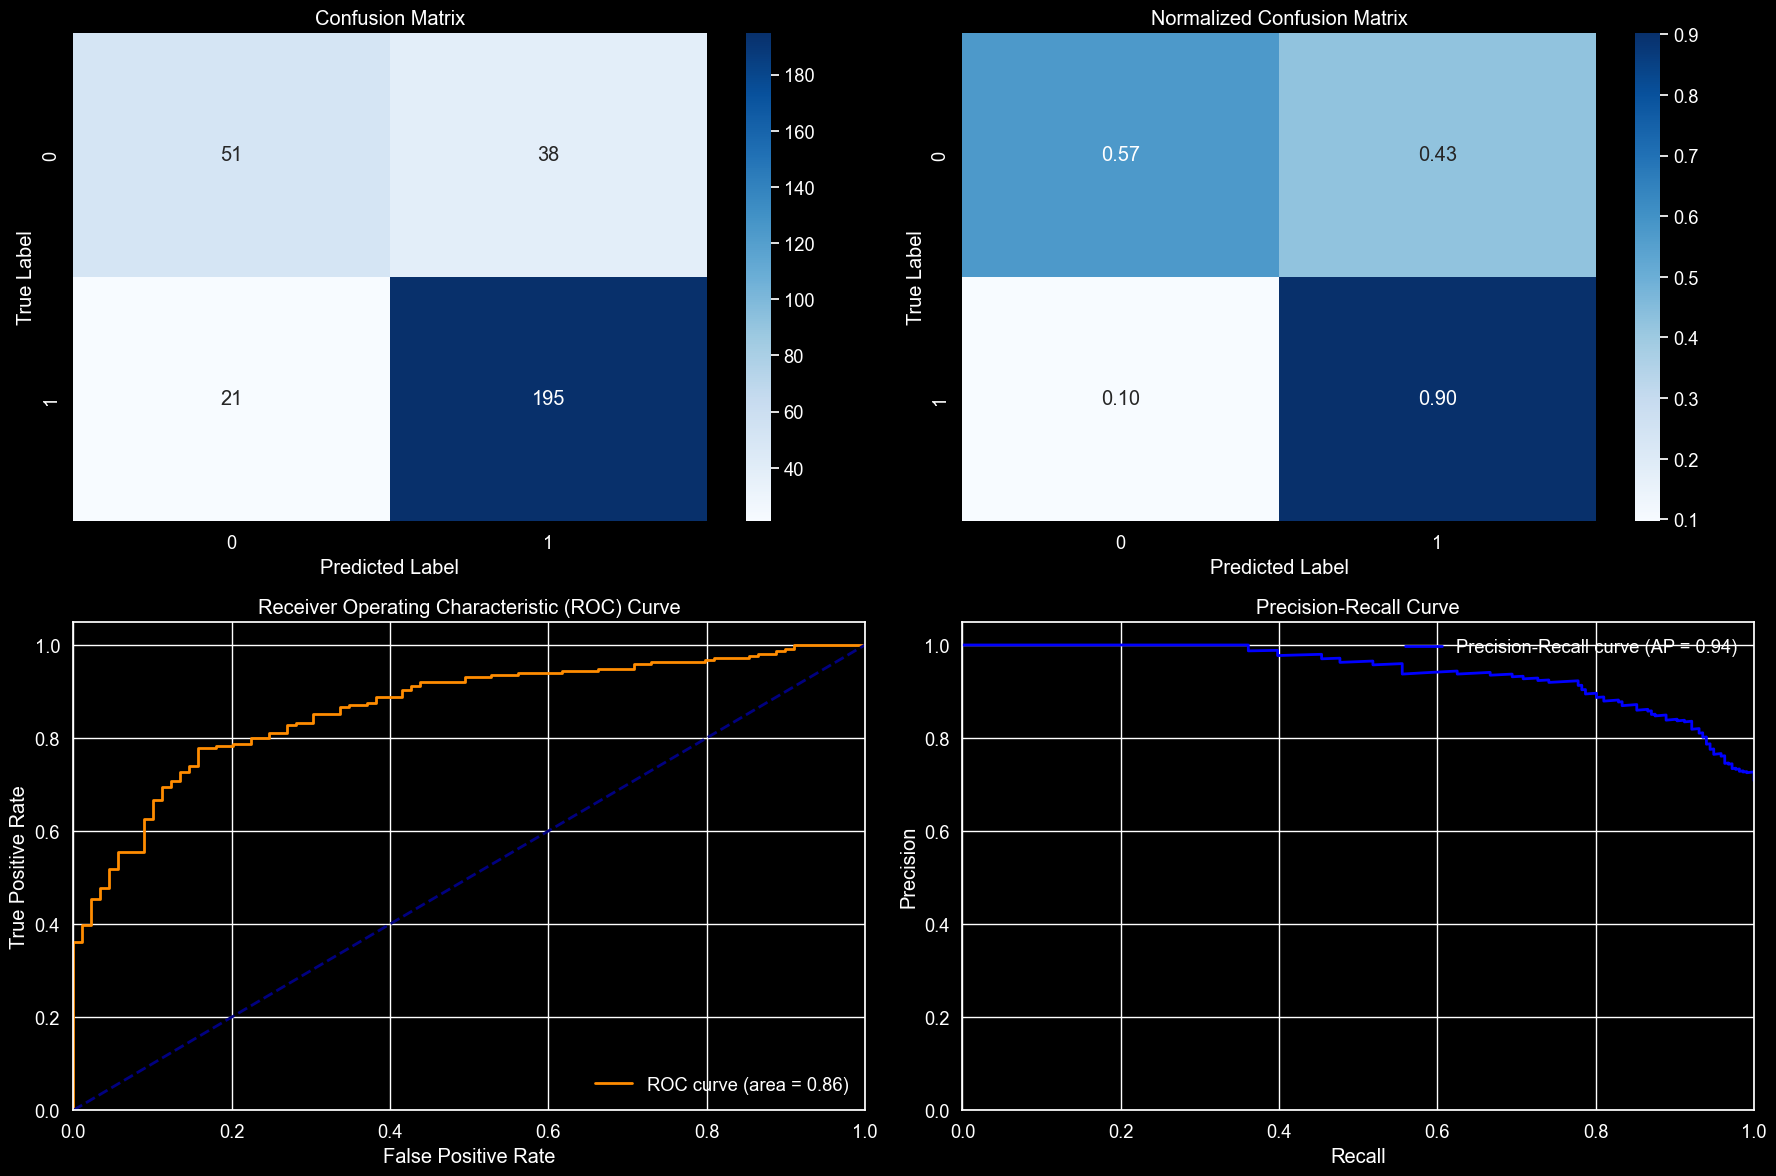

In [239]:
res = analyze_classification_model(model_logistic, x_test, y_test)
accuracy_scores_model["logistic_regression"] = res["accuracy"]

### 2. Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)


=== Classification Model Evaluation ===
Accuracy: 0.7967
Precision: 0.8438
Recall: 0.8750
F1 Score: 0.8591
ROC AUC: 0.8405118601747815
Average Precision: 0.9086671604564063

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.61      0.64        89
           1       0.84      0.88      0.86       216

    accuracy                           0.80       305
   macro avg       0.76      0.74      0.75       305
weighted avg       0.79      0.80      0.79       305



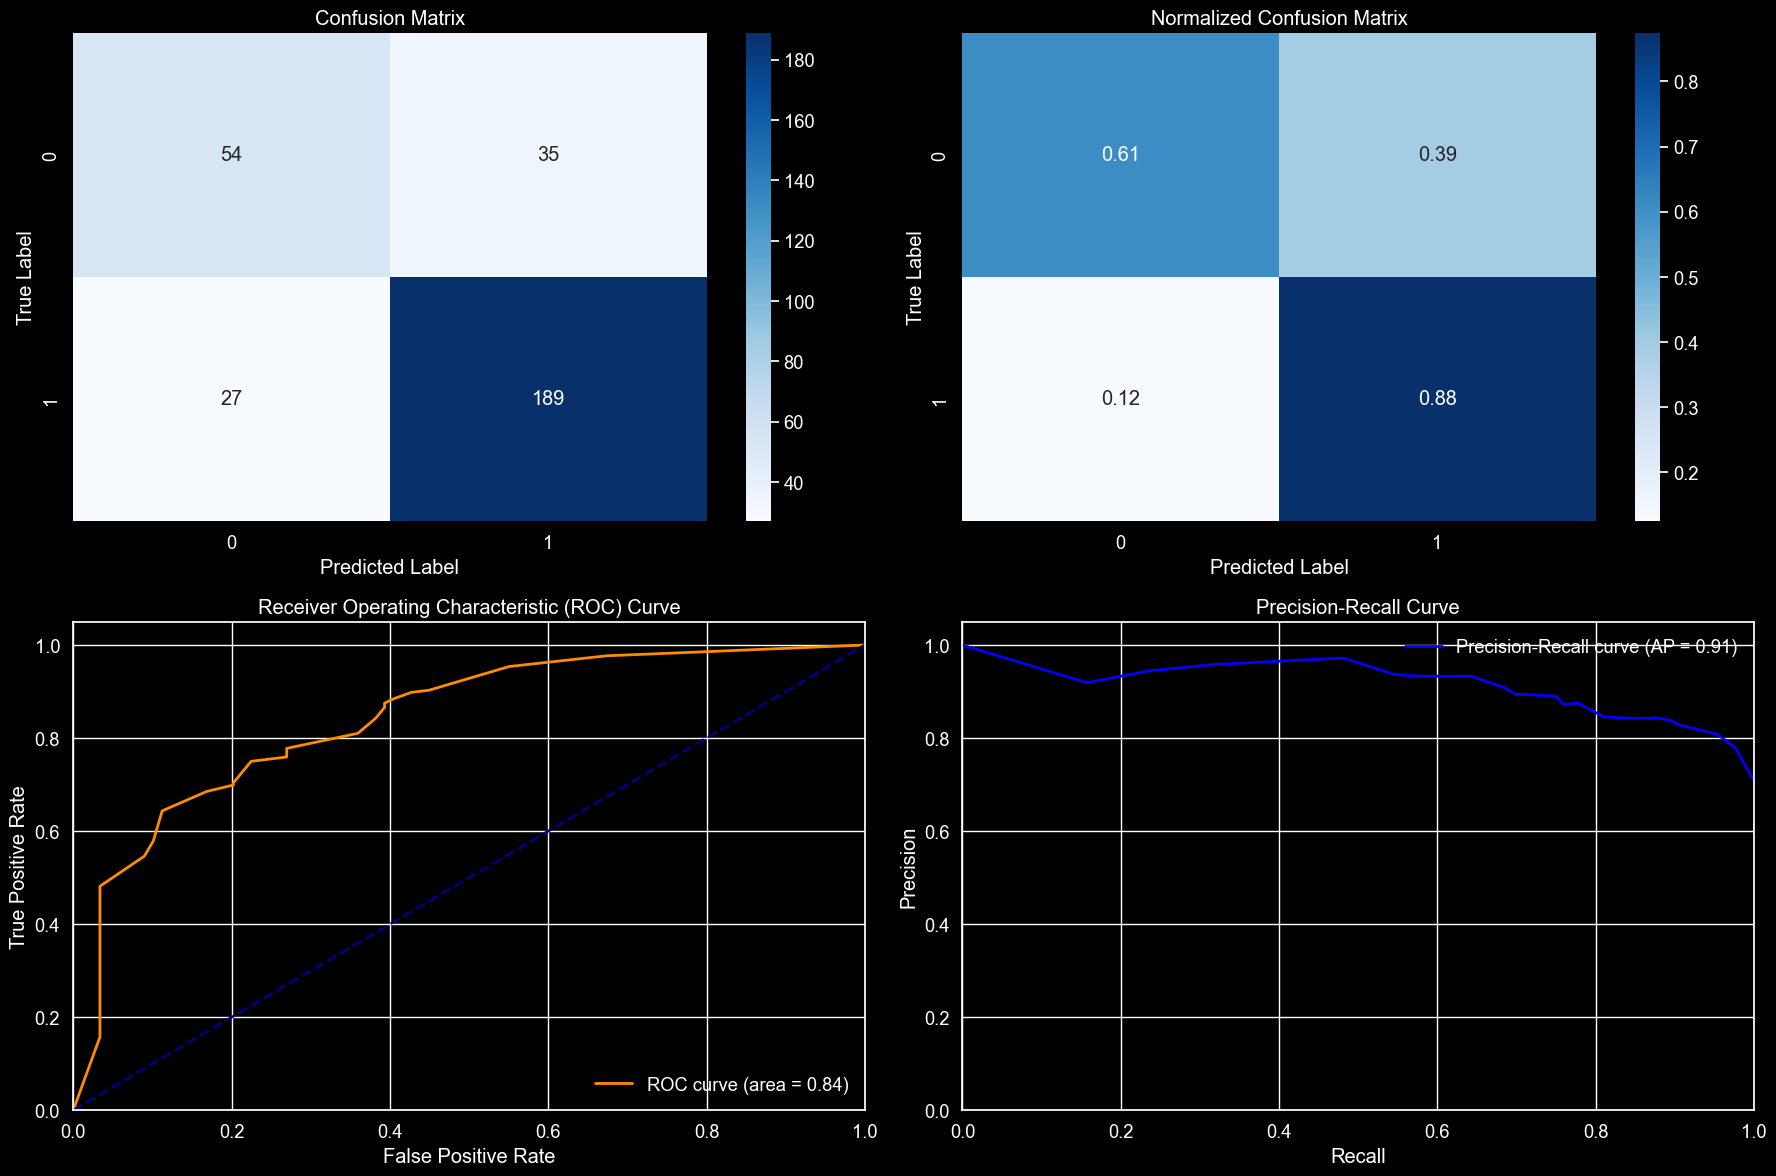

In [241]:
res = analyze_classification_model(model_dt, x_test, y_test)
accuracy_scores_model["decision_tree"] = res["accuracy"]

#### Grid Search 

In [242]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# Print best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train final model with best params
model_dt = grid_search.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy: 0.8270491803278688



=== Classification Model Evaluation ===
Accuracy: 0.7967
Precision: 0.8438
Recall: 0.8750
F1 Score: 0.8591
ROC AUC: 0.8405118601747815
Average Precision: 0.9086671604564063

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.61      0.64        89
           1       0.84      0.88      0.86       216

    accuracy                           0.80       305
   macro avg       0.76      0.74      0.75       305
weighted avg       0.79      0.80      0.79       305



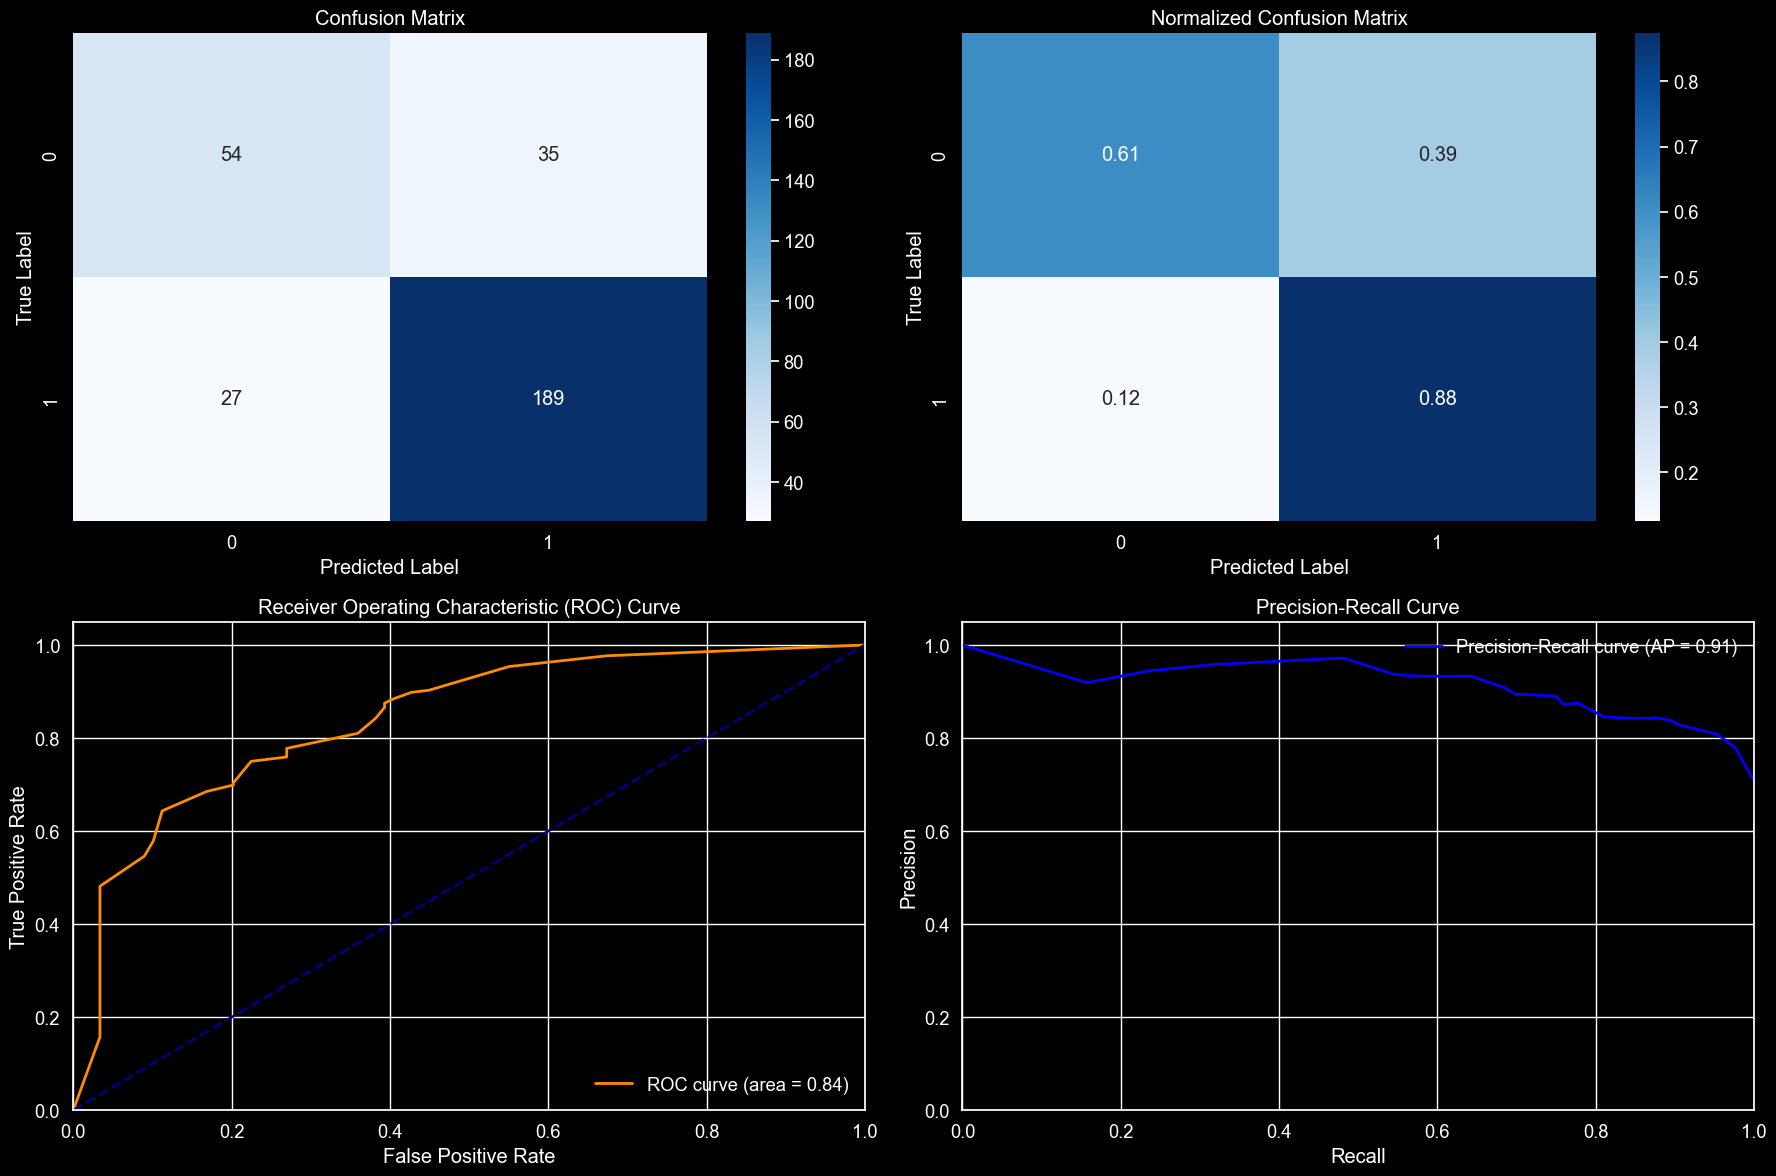

In [243]:
res = analyze_classification_model(model_dt, x_test, y_test)
accuracy_scores_model["decision_tree_grid_search"] = res["accuracy"]

- As we can see that accuracy is not that good, so we should go for Random forest

### 3. Random Forest Classifier

In [244]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
''' Random forest model'''

model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)


=== Classification Model Evaluation ===
Accuracy: 0.8066
Precision: 0.8458
Recall: 0.8889
F1 Score: 0.8668
ROC AUC: 0.8585882230545153
Average Precision: 0.9316210381703314

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        89
           1       0.85      0.89      0.87       216

    accuracy                           0.81       305
   macro avg       0.77      0.75      0.76       305
weighted avg       0.80      0.81      0.80       305



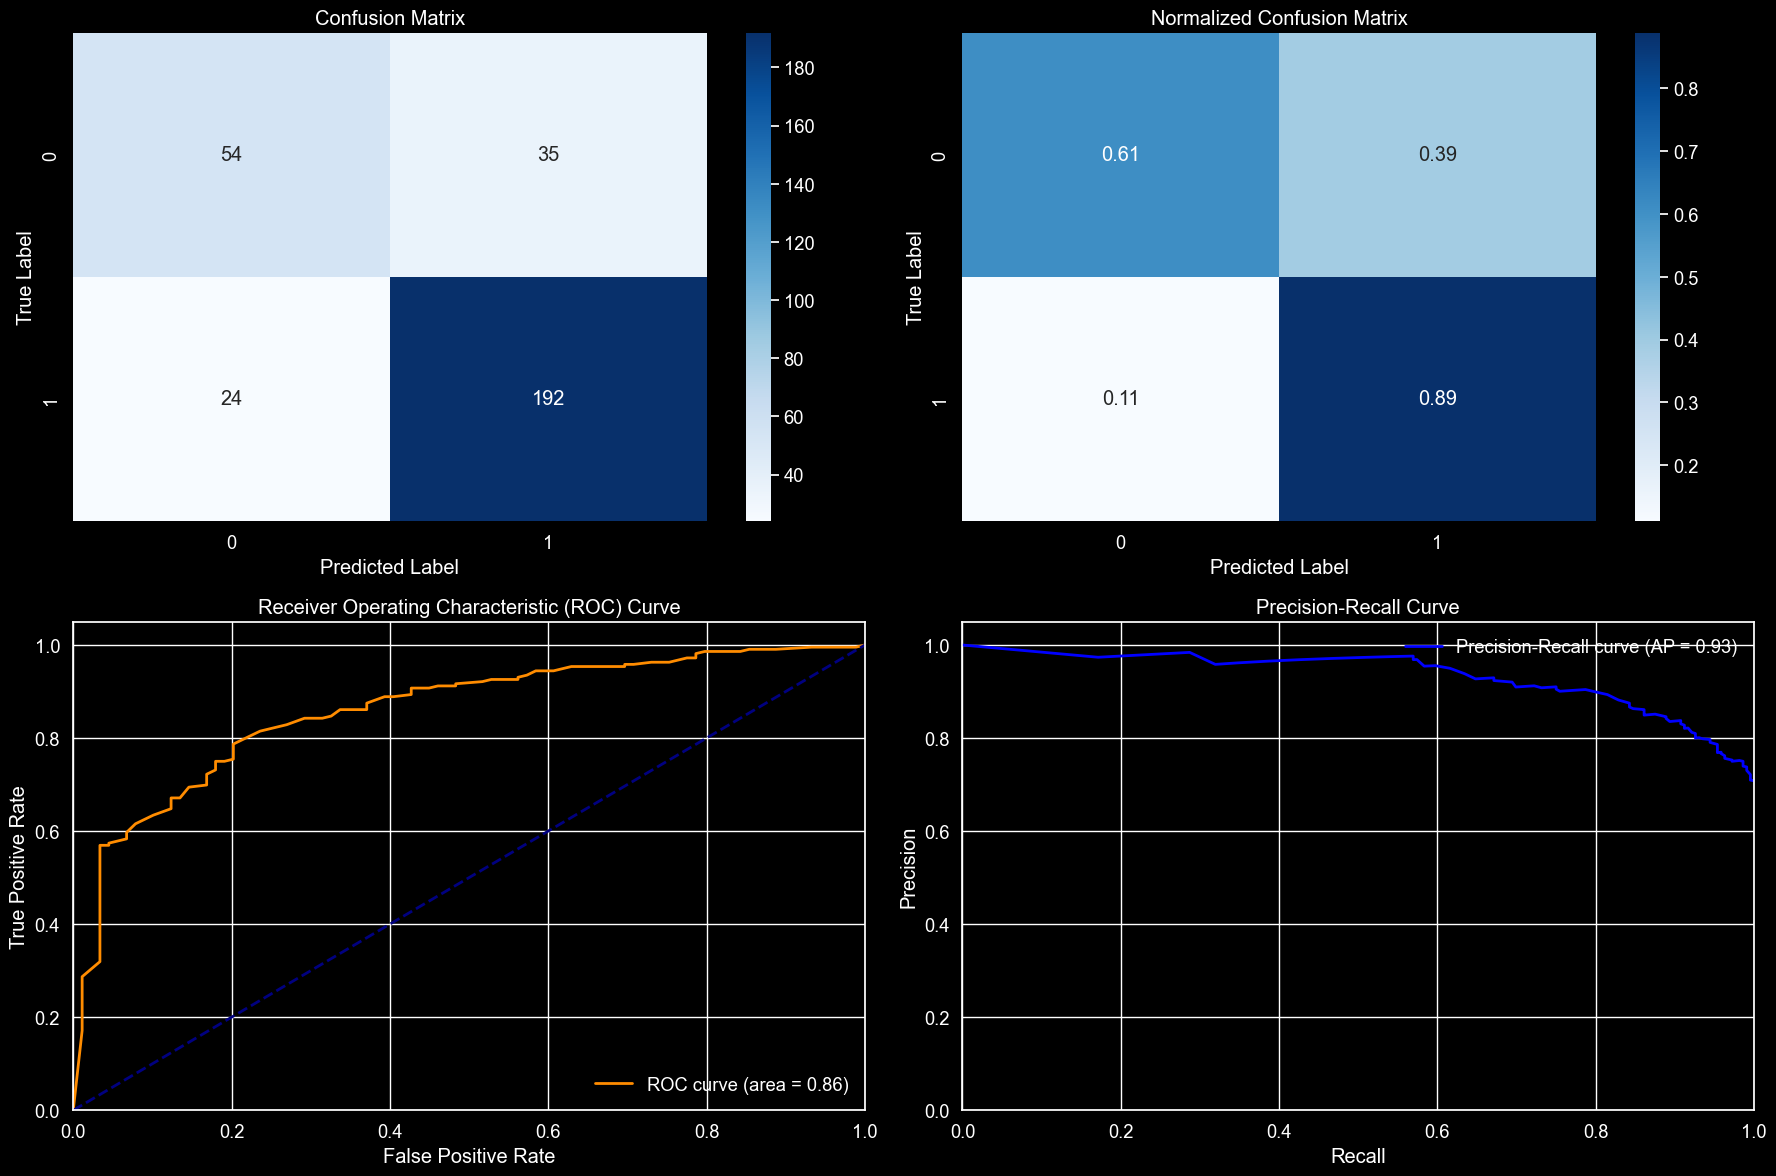

In [245]:
res = analyze_classification_model(model_rf, x_test, y_test)
accuracy_scores_model["random_forst"] = res["accuracy"]

### 4. XGBoost Model 

In [246]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(x_train, y_train)


C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:55:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


=== Classification Model Evaluation ===
Accuracy: 0.7902
Precision: 0.8486
Recall: 0.8565
F1 Score: 0.8525
ROC AUC: 0.8367665418227216
Average Precision: 0.9224215528755468

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.64      0.63      0.64        89
           1       0.85      0.86      0.85       216

    accuracy                           0.79       305
   macro avg       0.75      0.74      0.74       305
weighted avg       0.79      0.79      0.79       305



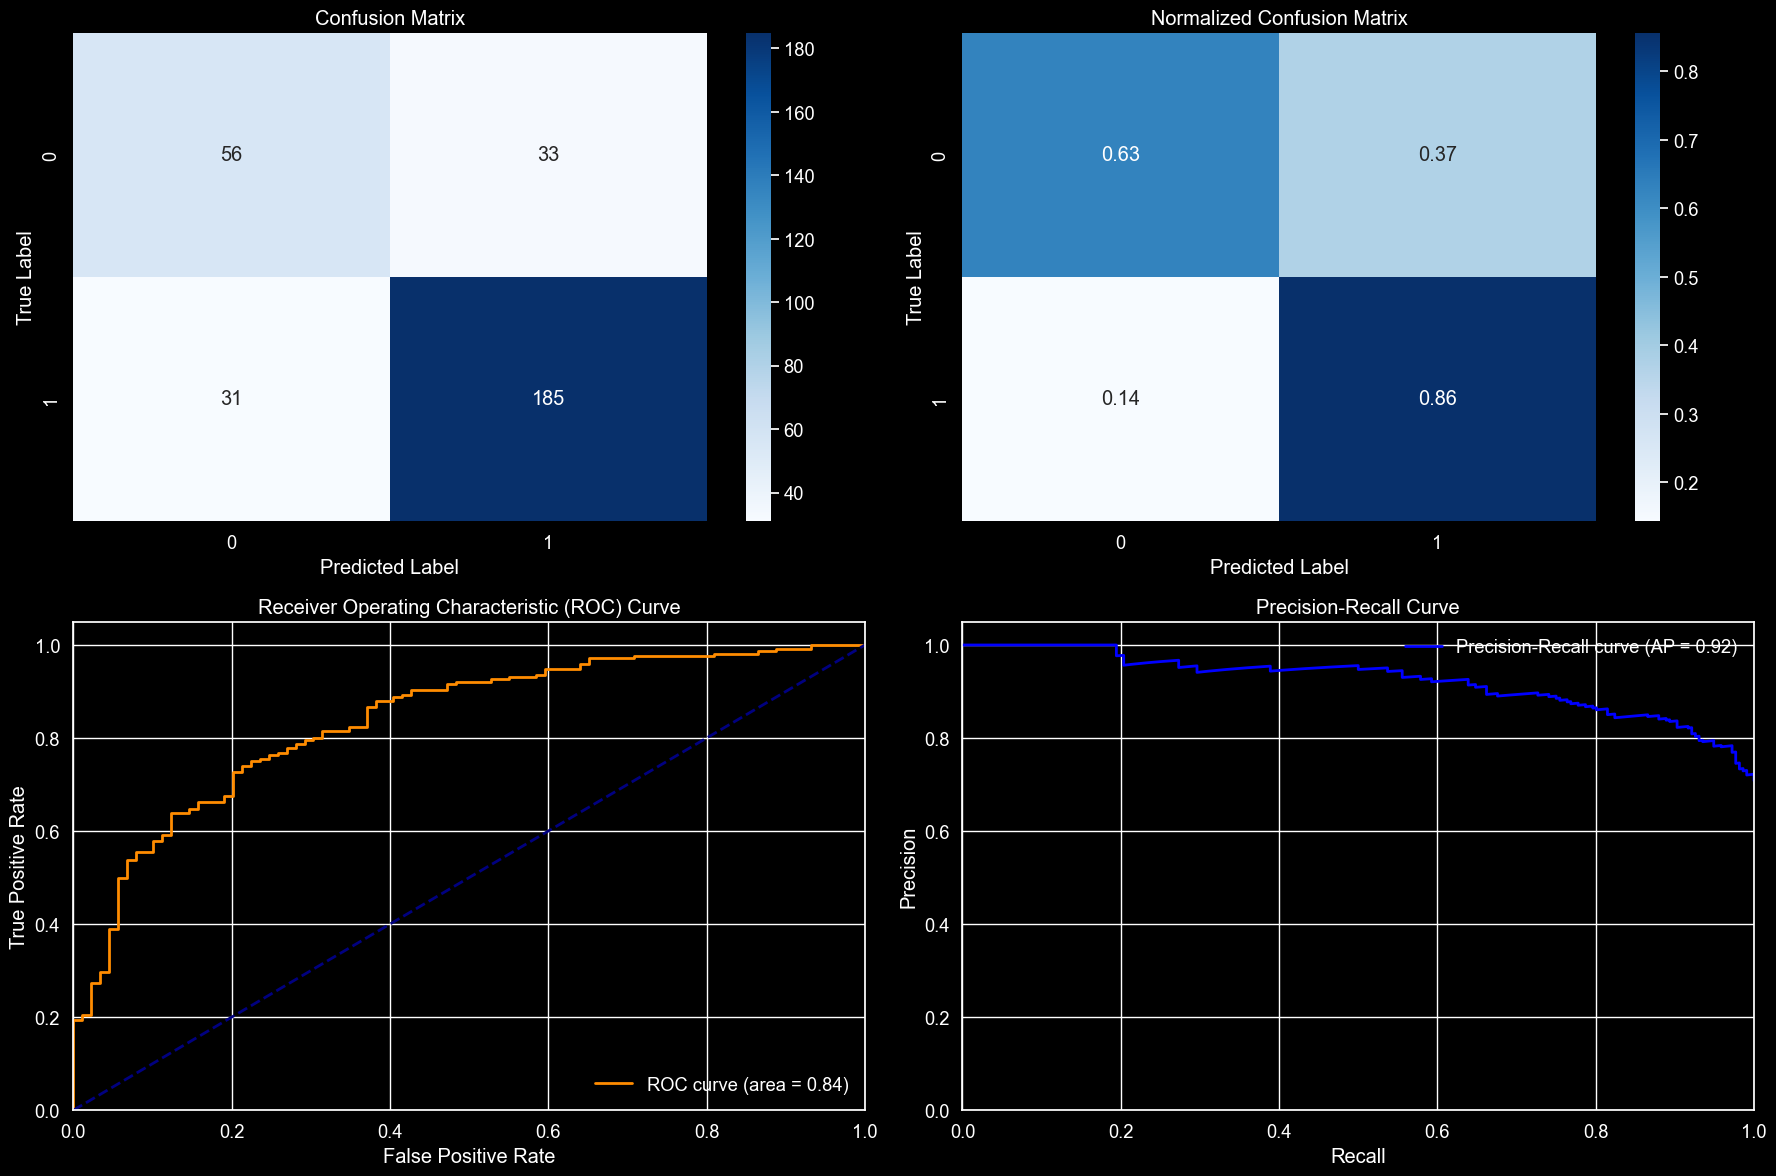

In [247]:
res = analyze_classification_model(model_xgb, x_test, y_test)
accuracy_scores_model["xgb"] = res["accuracy"]

<hr>

In [248]:
accuracy_scores_model

{'logistic_regression': 0.8065573770491803,
 'decision_tree': 0.7967213114754098,
 'decision_tree_grid_search': 0.7967213114754098,
 'random_forst': 0.8065573770491803,
 'xgb': 0.7901639344262295}